In [1]:
# loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv("bank_capstone.csv")
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.121864,-1,56,30,31.343340,-1.123485,AC,3359,...,0,200.0,0,INTERNET,6.160864,windows,0,1,0,6
1,0,0.8,0.422733,-1,300,50,0.026959,31.743971,AA,661,...,0,200.0,0,INTERNET,14.056637,macintosh,0,1,0,7
2,0,0.6,0.876756,-1,24,30,0.022468,14.987018,AA,1314,...,0,200.0,0,INTERNET,3.019067,windows,1,1,0,5
3,0,0.2,0.330775,-1,43,80,0.009066,49.257212,AA,2181,...,0,1000.0,0,INTERNET,3.965493,linux,1,1,0,6
4,0,0.7,0.287905,-1,38,20,0.021911,-0.848684,AC,1215,...,0,200.0,0,INTERNET,9.961255,linux,0,1,0,1


In [3]:
# shape
df.shape

# we have 

(100000, 32)

In [4]:
# chking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        100000 non-null  int64  
 1   income                            100000 non-null  float64
 2   name_email_similarity             100000 non-null  float64
 3   prev_address_months_count         100000 non-null  int64  
 4   current_address_months_count      100000 non-null  int64  
 5   customer_age                      100000 non-null  int64  
 6   days_since_request                100000 non-null  float64
 7   intended_balcon_amount            100000 non-null  float64
 8   payment_type                      100000 non-null  object 
 9   zip_count_4w                      100000 non-null  int64  
 10  velocity_6h                       100000 non-null  float64
 11  velocity_24h                      100000 non-null  fl

In [5]:
# chking for null values
df.isnull().sum()
# there are no null values

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [6]:
# chking for number of uniques values in every attributes
df.nunique()

fraud_bool                              2
income                                  9
name_email_similarity               99983
prev_address_months_count             359
current_address_months_count          404
customer_age                            9
days_since_request                  99900
intended_balcon_amount              99941
payment_type                            5
zip_count_4w                         5499
velocity_6h                         99986
velocity_24h                        99991
velocity_4w                         99986
bank_branch_count_8w                 2141
date_of_birth_distinct_emails_4w       38
employment_status                       7
credit_risk_score                     511
email_is_free                           2
housing_status                          7
phone_home_valid                        2
phone_mobile_valid                      2
bank_months_count                      32
has_other_cards                         2
proposed_credit_limit             

In [7]:
df['fraud_bool'].value_counts()

0    98864
1     1136
Name: fraud_bool, dtype: int64

In [8]:
# number of numerical and categorical columns
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(include=object)

In [9]:
num_col.shape

(100000, 27)

In [10]:
cat_col.shape

(100000, 5)

In [11]:
df.shape

(100000, 32)

In [12]:
# out of 32 attributes 
# we have 27 attributes which are numerical
# we have 5 attributes which are non_numerical

In [13]:
num_col.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.121864,-1,56,30,31.343340,-1.123485,3359,6367.819446,...,1,-1,0,200.0,0,6.160864,0,1,0,6
1,0,0.8,0.422733,-1,300,50,0.026959,31.743971,661,3002.317485,...,0,1,0,200.0,0,14.056637,0,1,0,7
2,0,0.6,0.876756,-1,24,30,0.022468,14.987018,1314,3597.265529,...,1,10,0,200.0,0,3.019067,1,1,0,5
3,0,0.2,0.330775,-1,43,80,0.009066,49.257212,2181,849.377040,...,1,1,0,1000.0,0,3.965493,1,1,0,6
4,0,0.7,0.287905,-1,38,20,0.021911,-0.848684,1215,7833.514142,...,1,-1,0,200.0,0,9.961255,0,1,0,1


In [14]:
cat_col.head()

,payment_type,employment_status,housing_status,source,device_os
0,AC,CB,BC,INTERNET,windows
1,AA,CA,BA,INTERNET,macintosh
2,AA,CA,BC,INTERNET,windows
3,AA,CC,BC,INTERNET,linux
4,AC,CD,BB,INTERNET,linux


In [15]:
# let's chk the number of unique values in categorical columns
cat_col.nunique()

payment_type         5
employment_status    7
housing_status       7
source               2
device_os            5
dtype: int64

In [16]:
# In categorical columns we have number of unique values which are very less
for i in cat_col:
    print(i)
    print('')
    print(cat_col[i].value_counts())
    print("------------------------")
    print('')

payment_type

AB    37078
AA    25989
AC    25013
AD    11889
AE       31
Name: payment_type, dtype: int64
------------------------

employment_status

CA    72992
CB    13952
CF     4432
CC     3741
CD     2655
CE     2190
CG       38
Name: employment_status, dtype: int64
------------------------

housing_status

BC    37186
BB    26072
BE    17015
BA    16907
BD     2619
BF      177
BG       24
Name: housing_status, dtype: int64
------------------------

source

INTERNET    99291
TELEAPP       709
Name: source, dtype: int64
------------------------

device_os

other        34133
linux        33336
windows      26391
macintosh     5419
x11            721
Name: device_os, dtype: int64
------------------------



In [17]:
# Inferances of the attributes

In [18]:
# let's chk for numerical columns

In [19]:
num_col.head(20)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.121864,-1,56,30,31.343340,-1.123485,3359,6367.819446,...,1,-1,0,200.0,0,6.160864,0,1,0,6
1,0,0.8,0.422733,-1,300,50,0.026959,31.743971,661,3002.317485,...,0,1,0,200.0,0,14.056637,0,1,0,7
2,0,0.6,0.876756,-1,24,30,0.022468,14.987018,1314,3597.265529,...,1,10,0,200.0,0,3.019067,1,1,0,5
3,0,0.2,0.330775,-1,43,80,0.009066,49.257212,2181,849.377040,...,1,1,0,1000.0,0,3.965493,1,1,0,6
4,0,0.7,0.287905,-1,38,20,0.021911,-0.848684,1215,7833.514142,...,1,-1,0,200.0,0,9.961255,0,1,0,1
5,0,0.6,0.916523,-1,172,20,0.003178,-0.863275,656,4536.769308,...,1,10,0,500.0,0,3.478366,0,1,0,2
6,0,0.3,0.765765,-1,188,50,0.024391,-0.713885,802,10755.987399,...,0,3,0,1500.0,0,3.779249,0,1,0,1
7,0,0.2,0.399726,-1,155,40,6.387676,24.273866,1363,6706.180668,...,1,28,0,200.0,0,5.011555,0,1,0,1
8,0,0.2,0.822316,-1,95,30,0.019160,49.410060,2568,8874.415740,...,1,1,0,200.0,0,1.908412,1,1,0,1
9,0,0.1,0.205170,-1,96,20,0.006541,-1.247120,785,4630.630147,...,1,-1,0,200.0,0,6.241908,1,1,0,5


In [20]:
num_col.nunique()

fraud_bool                              2
income                                  9
name_email_similarity               99983
prev_address_months_count             359
current_address_months_count          404
customer_age                            9
days_since_request                  99900
intended_balcon_amount              99941
zip_count_4w                         5499
velocity_6h                         99986
velocity_24h                        99991
velocity_4w                         99986
bank_branch_count_8w                 2141
date_of_birth_distinct_emails_4w       38
credit_risk_score                     511
email_is_free                           2
phone_home_valid                        2
phone_mobile_valid                      2
bank_months_count                      32
has_other_cards                         2
proposed_credit_limit                  12
foreign_request                         2
session_length_in_minutes           99773
keep_alive_session                

In [21]:
# In numerical columns also we have some of the columns which are categorical
# categorical columns in num_col 
# fraud_bool, email_is_free, phone_home_valid
# has_other_cards, foreign_request, keep_alive_session   

In [22]:
num_col.nunique()[num_col.nunique()<10]

fraud_bool                   2
income                       9
customer_age                 9
email_is_free                2
phone_home_valid             2
phone_mobile_valid           2
has_other_cards              2
foreign_request              2
keep_alive_session           2
device_distinct_emails_8w    4
device_fraud_count           1
month                        8
dtype: int64

In [23]:
# chking for statistical information
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,100000.0,0.011360,0.105977,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,100000.0,0.563180,0.290556,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,100000.0,0.492965,0.289540,1.015545e-05,0.224344,0.490710,0.755503,0.999998
prev_address_months_count,100000.0,16.779630,44.279315,-1.000000e+00,-1.000000,-1.000000,12.000000,377.000000
current_address_months_count,100000.0,86.883210,88.612535,-1.000000e+00,19.000000,53.000000,130.000000,428.000000
customer_age,100000.0,33.652100,12.042866,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,100000.0,1.029584,5.359435,1.936134e-07,0.007182,0.015180,0.026383,75.829756
intended_balcon_amount,100000.0,8.770065,20.359234,-1.438393e+01,-1.180906,-0.827363,5.793926,112.452078
zip_count_4w,100000.0,1571.683670,1007.050326,2.000000e+00,894.000000,1257.000000,1948.000000,6518.000000
velocity_6h,100000.0,5669.144969,3002.228141,-8.006206e+01,3454.284760,5325.577794,7680.877641,16545.254135


### Univariate Analysis - Num_cols

In [24]:
bank = df.copy()

In [26]:
bank.shape

(100000, 32)

fraud_bool


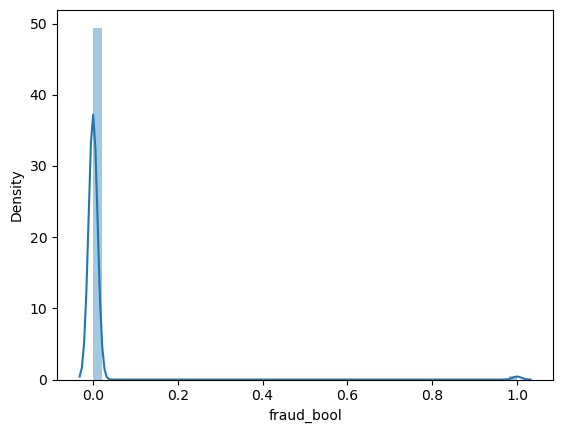

skewness 9.221833375438578
kruotesis 83.0438716813868
****************************************************************************************************
income


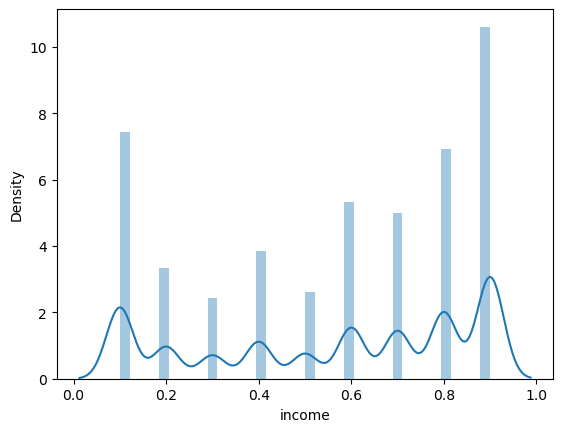

skewness -0.386616791977144
kruotesis -1.3016902352892883
****************************************************************************************************
name_email_similarity


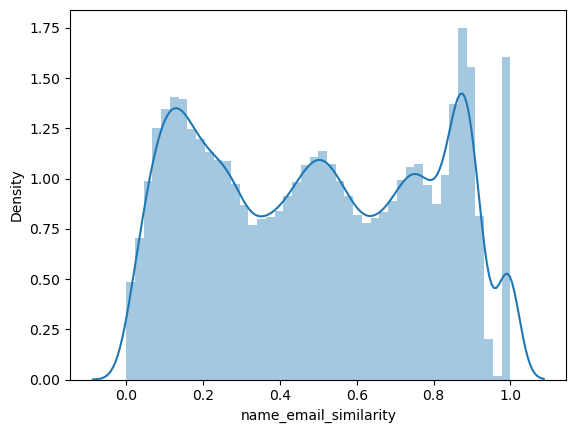

skewness 0.05006513255991797
kruotesis -1.2828303086734374
****************************************************************************************************
prev_address_months_count


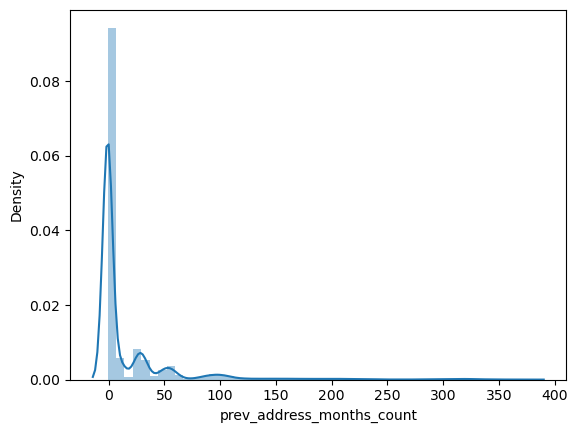

skewness 4.063968558085661
kruotesis 20.011099882756923
****************************************************************************************************
current_address_months_count


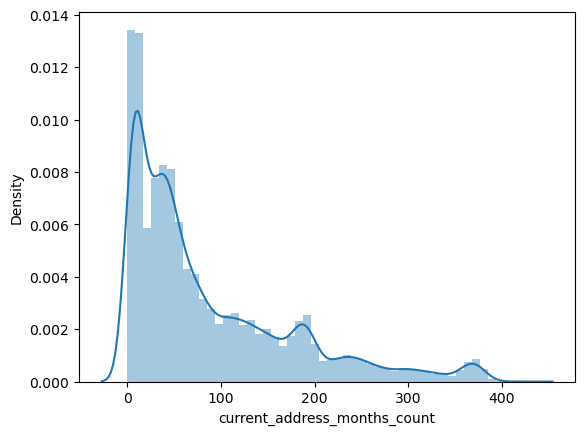

skewness 1.3860242372133307
kruotesis 1.351992337030913
****************************************************************************************************
customer_age


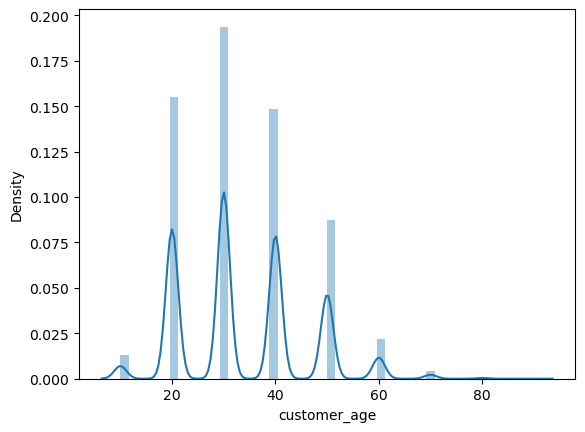

skewness 0.4806415936373318
kruotesis -0.1219674572879863
****************************************************************************************************
days_since_request


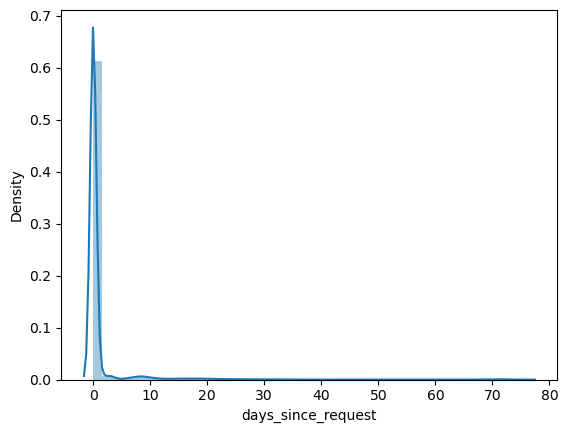

skewness 9.23441740669412
kruotesis 105.97767677144127
****************************************************************************************************
intended_balcon_amount


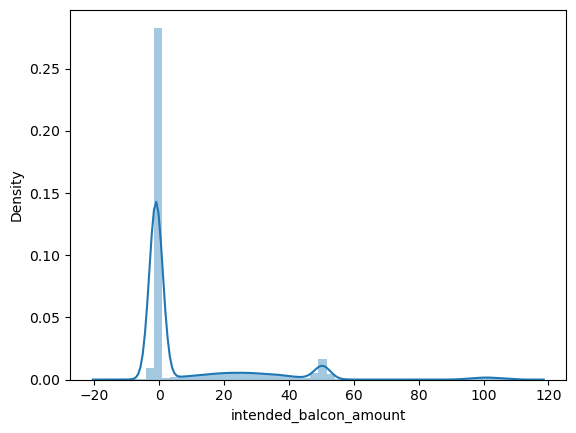

skewness 2.485738165497058
kruotesis 6.7031844163308385
****************************************************************************************************
zip_count_4w


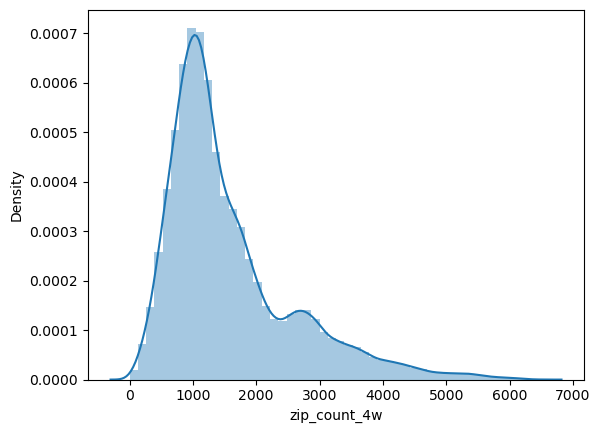

skewness 1.4590247636242561
kruotesis 2.166006096870833
****************************************************************************************************
velocity_6h


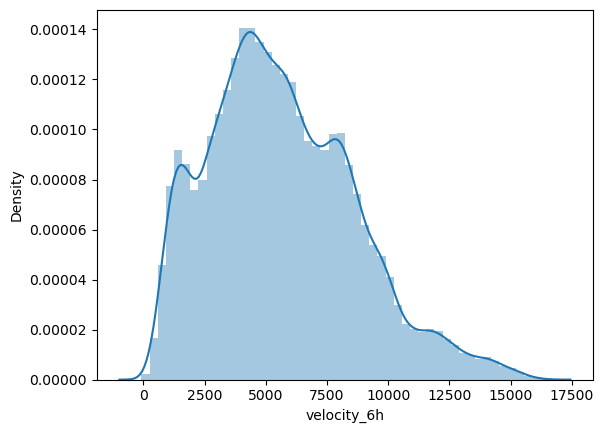

skewness 0.5618153363020827
kruotesis 0.014514655326053116
****************************************************************************************************
velocity_24h


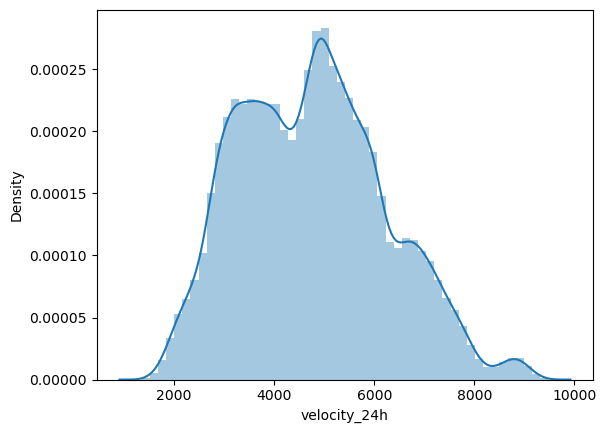

skewness 0.32693088589642844
kruotesis -0.3859970605198617
****************************************************************************************************
velocity_4w


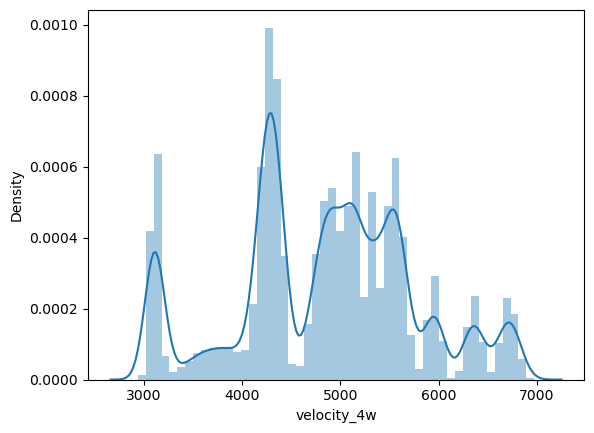

skewness -0.060016851028918856
kruotesis -0.3623633872284504
****************************************************************************************************
bank_branch_count_8w


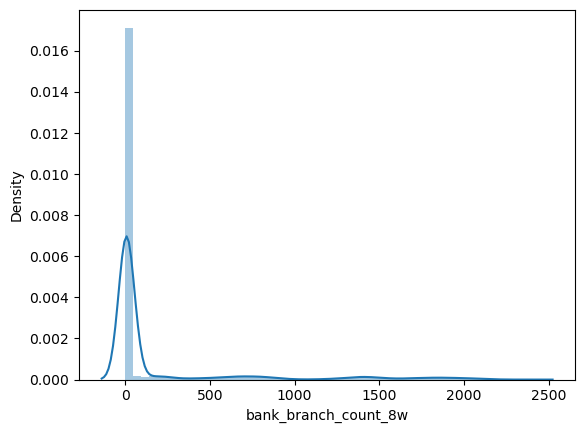

skewness 2.7434061858294094
kruotesis 6.480716089055374
****************************************************************************************************
date_of_birth_distinct_emails_4w


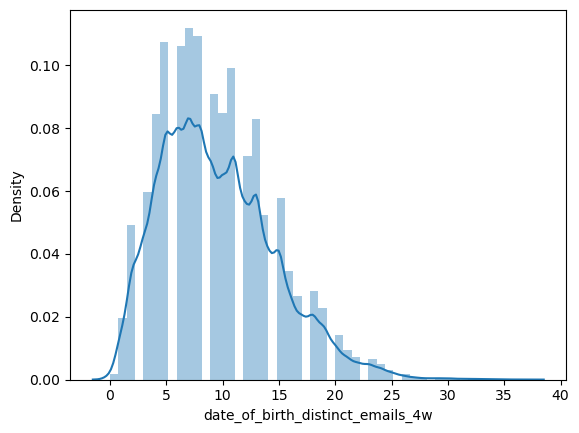

skewness 0.7030623685386966
kruotesis 0.42413120846457497
****************************************************************************************************
credit_risk_score


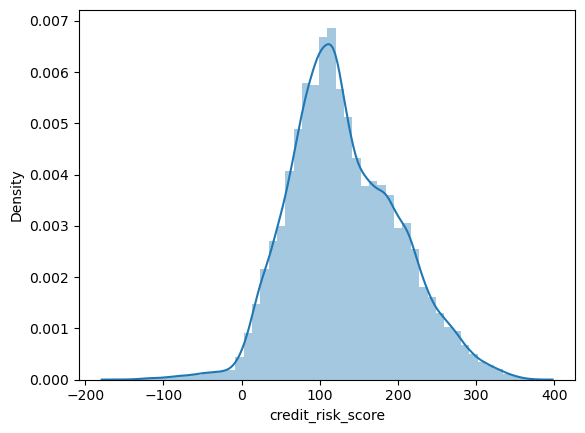

skewness 0.2920246975462634
kruotesis 0.08081872451899574
****************************************************************************************************
email_is_free


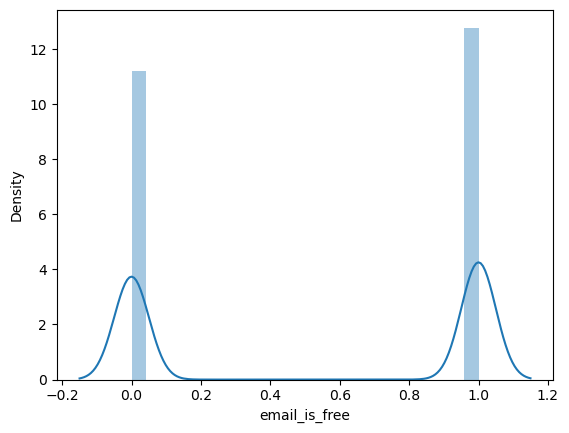

skewness -0.13039821952064923
kruotesis -1.9830359654651657
****************************************************************************************************
phone_home_valid


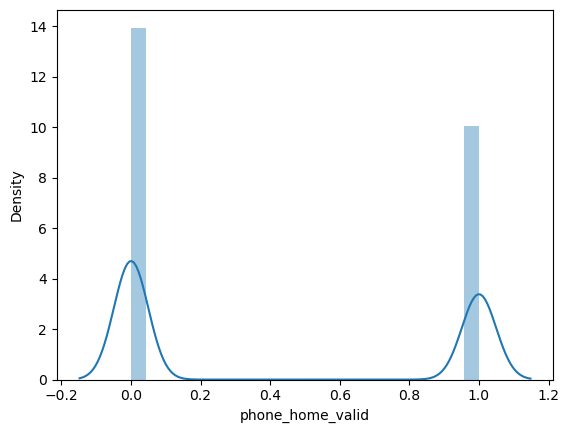

skewness 0.3296743358410871
kruotesis -1.891352659740945
****************************************************************************************************
phone_mobile_valid


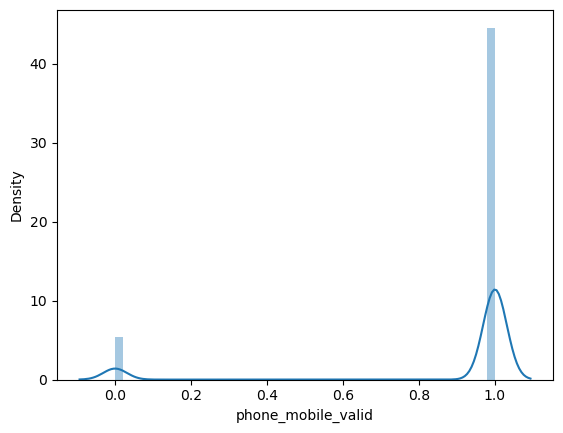

skewness -2.5114989124482476
kruotesis 4.307712941087569
****************************************************************************************************
bank_months_count


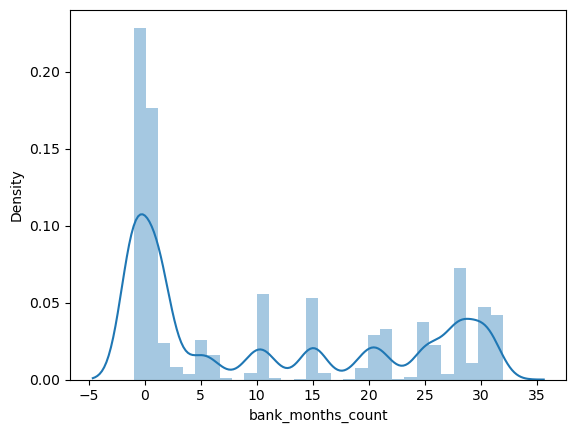

skewness 0.47909986127360826
kruotesis -1.4462818276982405
****************************************************************************************************
has_other_cards


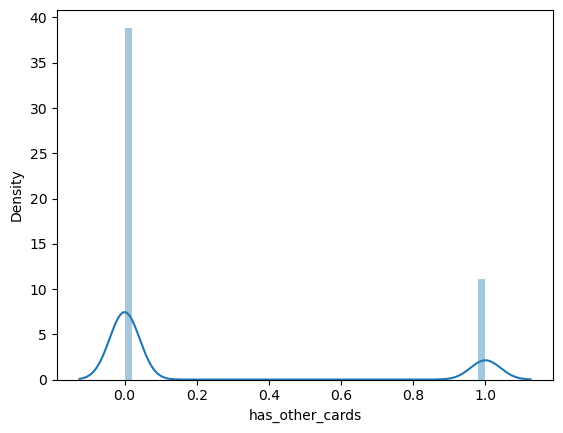

skewness 1.3356460338868663
kruotesis -0.2160539936421615
****************************************************************************************************
proposed_credit_limit


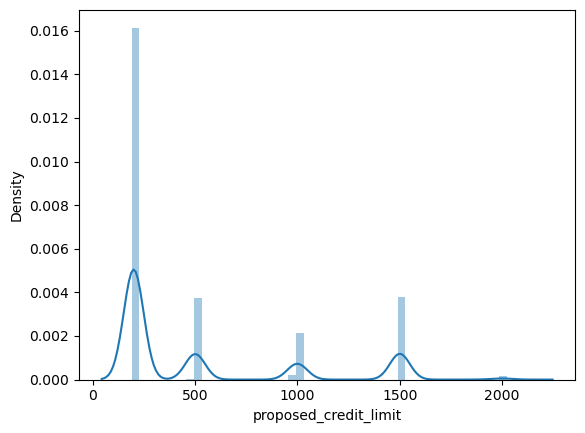

skewness 1.3138064473010531
kruotesis 0.20754532498715328
****************************************************************************************************
foreign_request


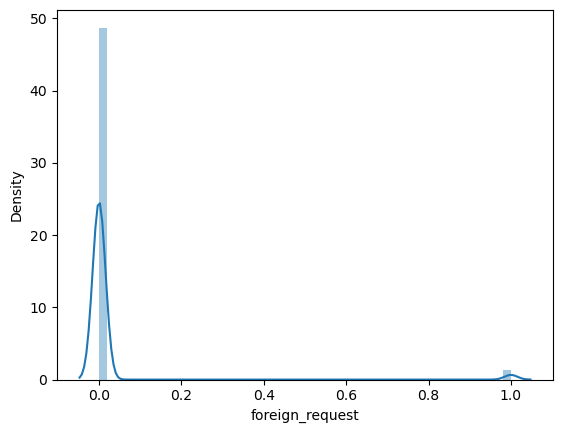

skewness 6.011293964052436
kruotesis 34.13633784861036
****************************************************************************************************
session_length_in_minutes


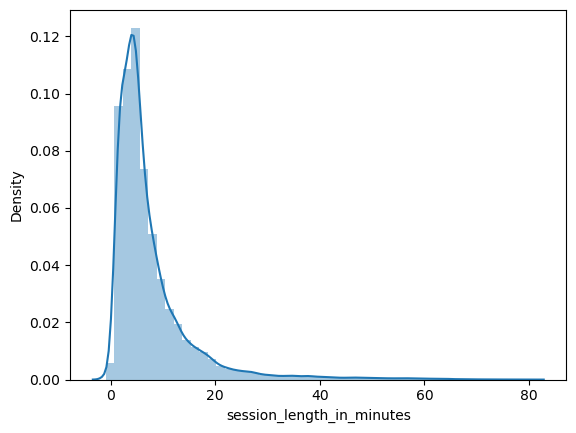

skewness 3.313073663046496
kruotesis 14.928089404114328
****************************************************************************************************
keep_alive_session


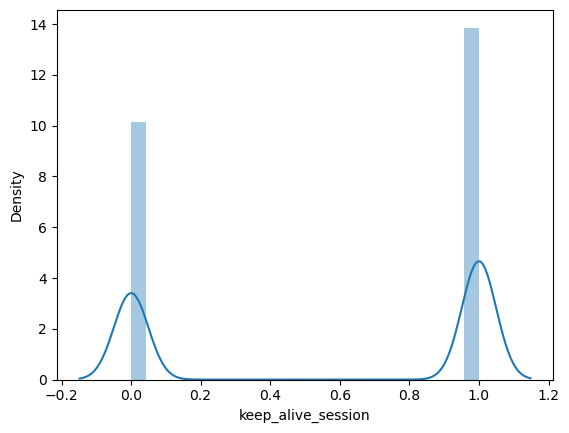

skewness -0.3148758407345062
kruotesis -1.9008912231462127
****************************************************************************************************
device_distinct_emails_8w


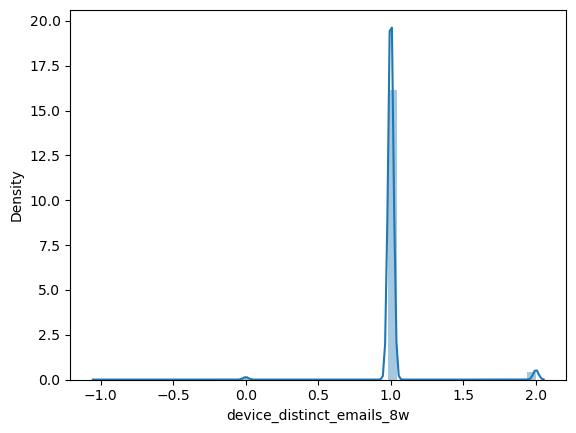

skewness 2.2975310711464463
kruotesis 31.969392451723216
****************************************************************************************************
device_fraud_count


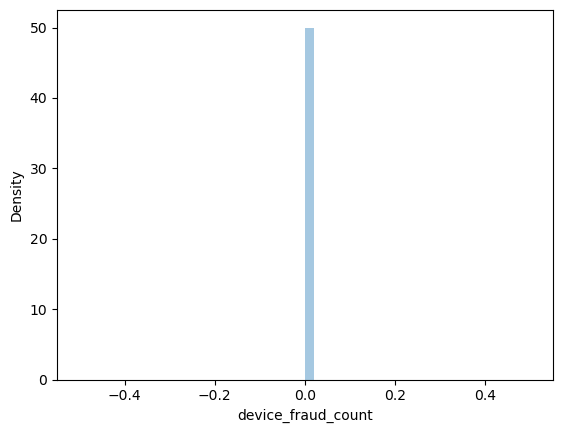

skewness 0
kruotesis 0
****************************************************************************************************
month


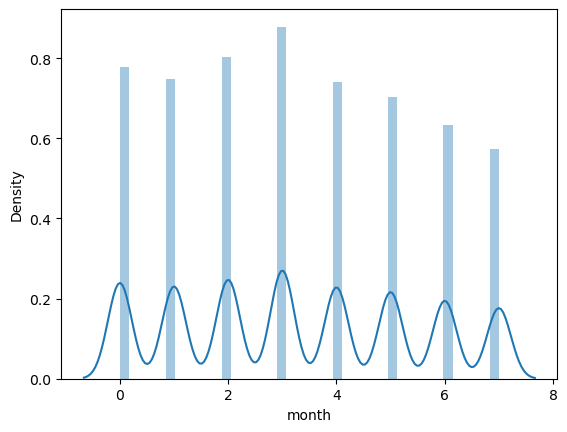

skewness 0.11212543749582314
kruotesis -1.1331842099224512
****************************************************************************************************


In [27]:
for i in bank.select_dtypes(include=np.number):
    print(i)
    sns.distplot(bank[i])
    plt.show()
    print('skewness',bank[i].skew())
    print('kruotesis',bank[i].kurt())
    print('*****'*20)

In [28]:
bank.shape

(100000, 32)

In [29]:
b_num_col = bank.select_dtypes(include=np.number)
b_cat_col = bank.select_dtypes(include=object)

In [30]:
b_num_col.shape

(100000, 27)

In [31]:
# Create a list of numeric features in the DataFrame bank
numeric_features = [x for x in bank.columns if bank[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


In [32]:
b_num_col.shape

(100000, 27)

In [33]:
print("Skewness")
print('')
for i in b_num_col:
    print(i,':',b_num_col[i].skew())
#     print('')

Skewness

fraud_bool : 9.221833375438578
income : -0.386616791977144
name_email_similarity : 0.05006513255991797
prev_address_months_count : 4.063968558085661
current_address_months_count : 1.3860242372133307
customer_age : 0.4806415936373318
days_since_request : 9.23441740669412
intended_balcon_amount : 2.485738165497058
zip_count_4w : 1.4590247636242561
velocity_6h : 0.5618153363020827
velocity_24h : 0.32693088589642844
velocity_4w : -0.060016851028918856
bank_branch_count_8w : 2.7434061858294094
date_of_birth_distinct_emails_4w : 0.7030623685386966
credit_risk_score : 0.2920246975462634
email_is_free : -0.13039821952064923
phone_home_valid : 0.3296743358410871
phone_mobile_valid : -2.5114989124482476
bank_months_count : 0.47909986127360826
has_other_cards : 1.3356460338868663
proposed_credit_limit : 1.3138064473010531
foreign_request : 6.011293964052436
session_length_in_minutes : 3.313073663046496
keep_alive_session : -0.3148758407345062
device_distinct_emails_8w : 2.29753107114644

In [34]:
print("Kurtosis")
print('')
for i in b_num_col:
    print(i,':',b_num_col[i].kurtosis())
#     print('')

Kurtosis

fraud_bool : 83.0438716813868
income : -1.3016902352892883
name_email_similarity : -1.2828303086734374
prev_address_months_count : 20.011099882756923
current_address_months_count : 1.351992337030913
customer_age : -0.1219674572879863
days_since_request : 105.97767677144127
intended_balcon_amount : 6.7031844163308385
zip_count_4w : 2.166006096870833
velocity_6h : 0.014514655326053116
velocity_24h : -0.3859970605198617
velocity_4w : -0.3623633872284504
bank_branch_count_8w : 6.480716089055374
date_of_birth_distinct_emails_4w : 0.42413120846457497
credit_risk_score : 0.08081872451899574
email_is_free : -1.9830359654651657
phone_home_valid : -1.891352659740945
phone_mobile_valid : 4.307712941087569
bank_months_count : -1.4462818276982405
has_other_cards : -0.2160539936421615
proposed_credit_limit : 0.20754532498715328
foreign_request : 34.13633784861036
session_length_in_minutes : 14.928089404114328
keep_alive_session : -1.9008912231462127
device_distinct_emails_8w : 31.969392451

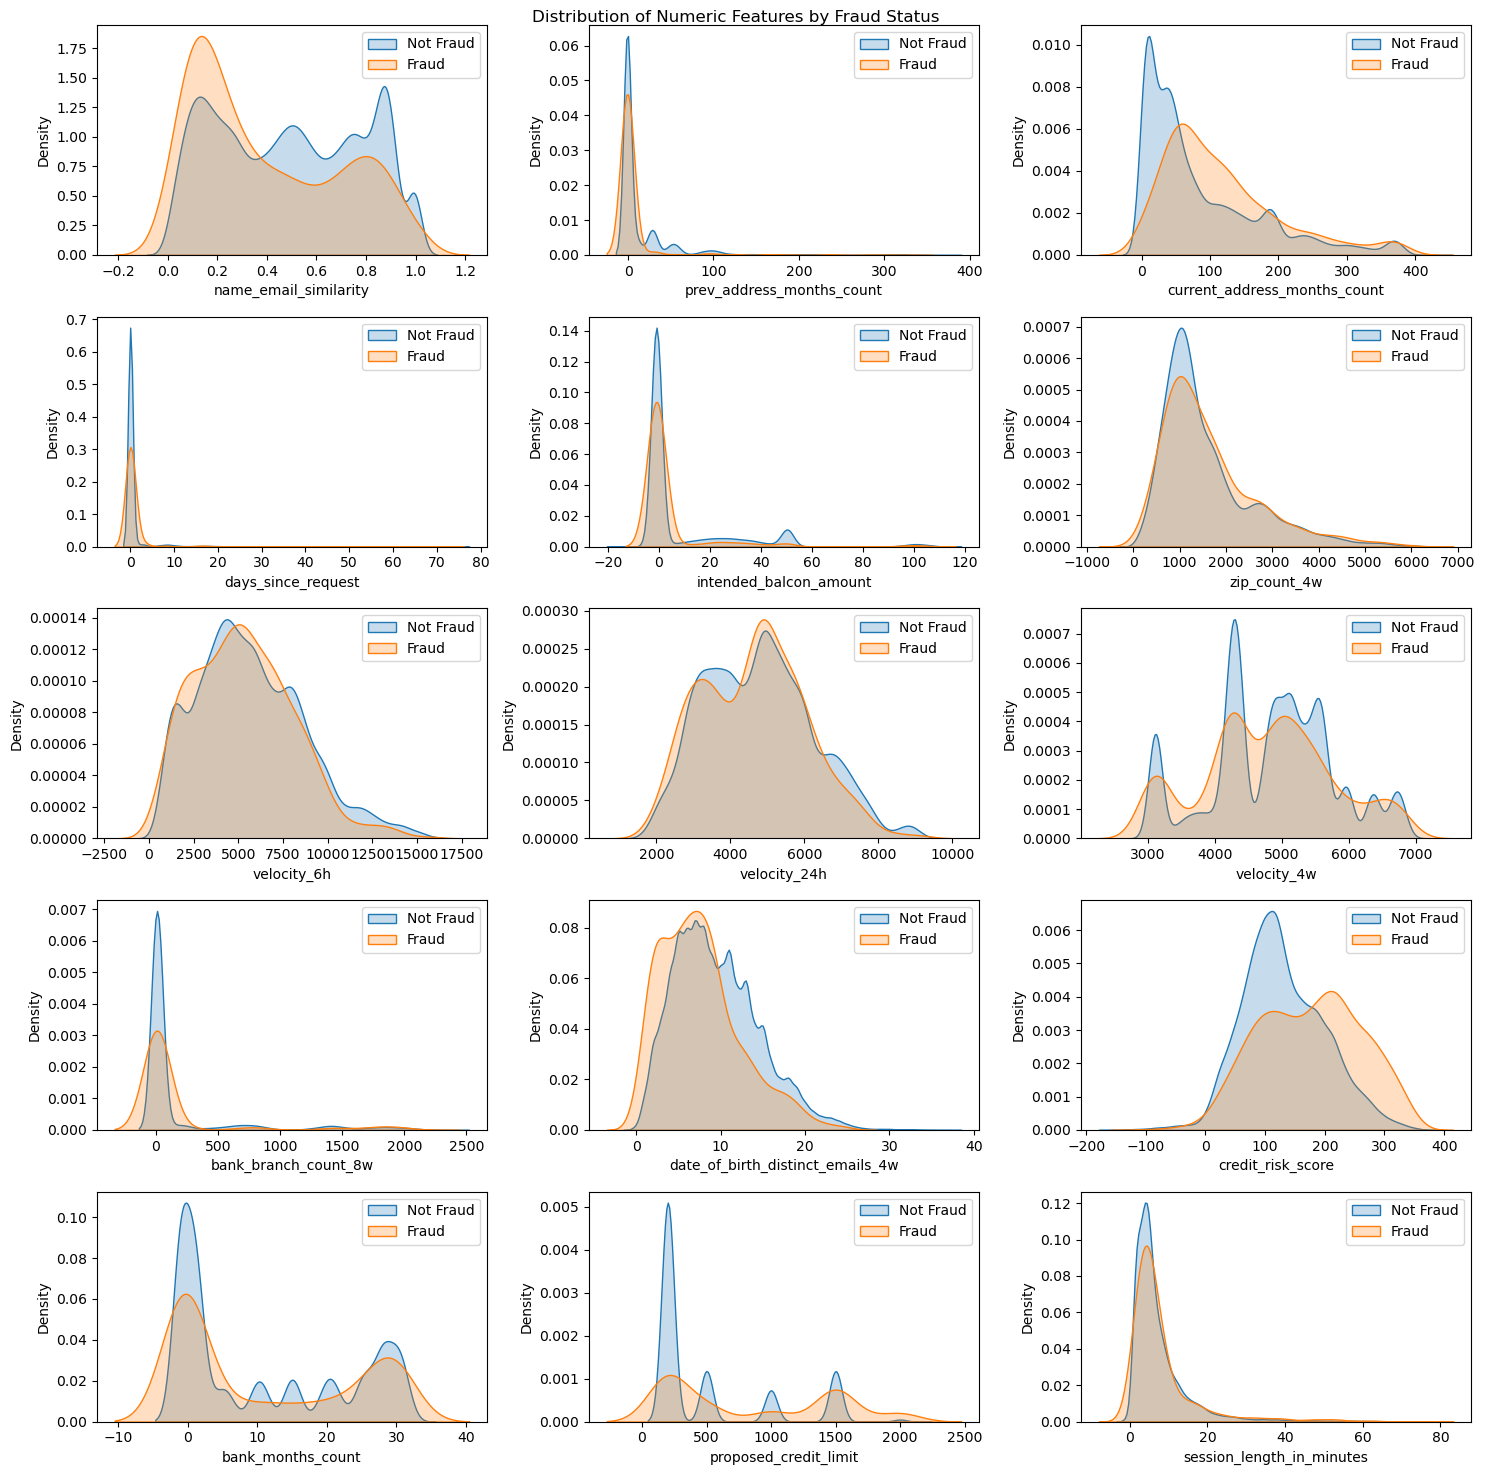

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=bank[bank['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=bank[bank['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

fraud_bool


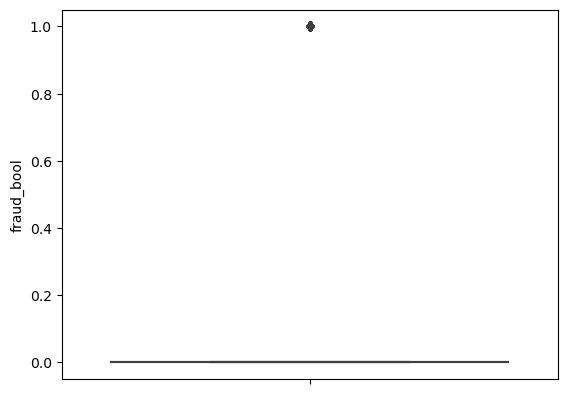

income


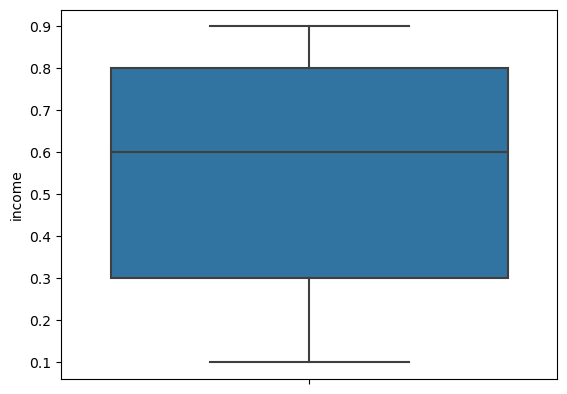

name_email_similarity


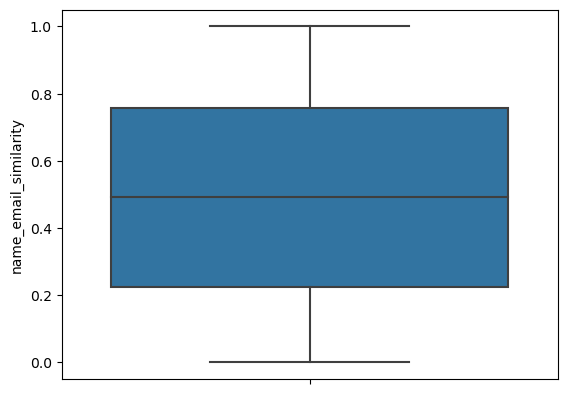

prev_address_months_count


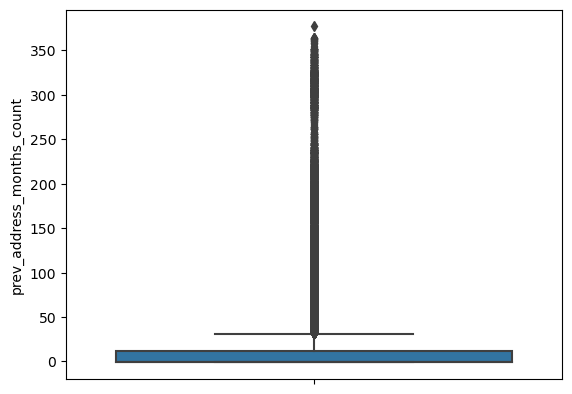

current_address_months_count


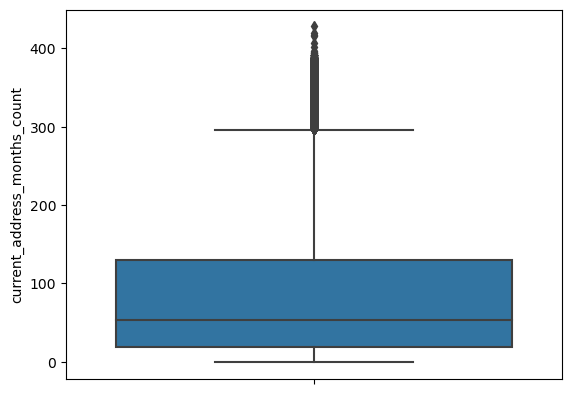

customer_age


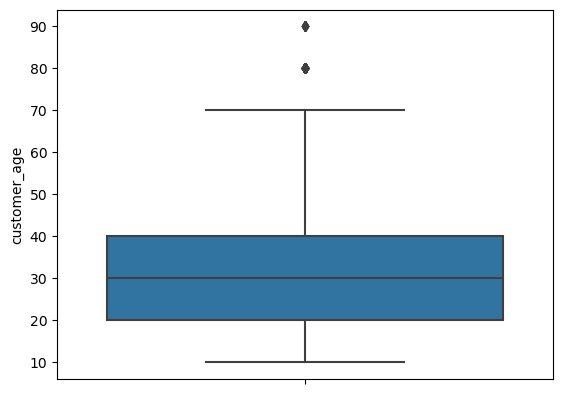

days_since_request


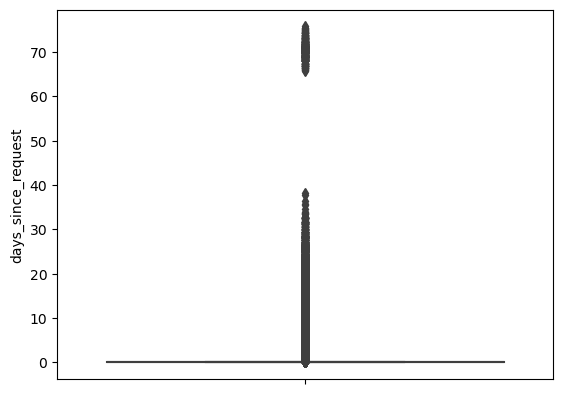

intended_balcon_amount


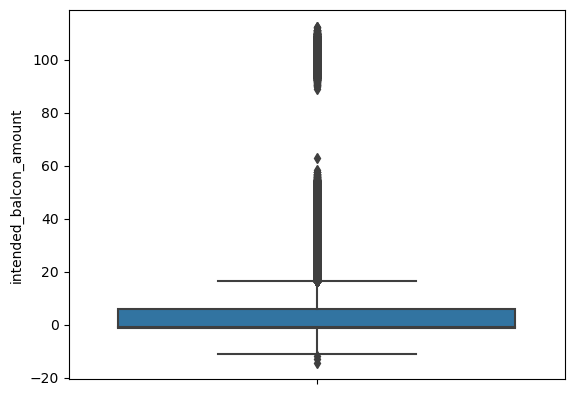

zip_count_4w


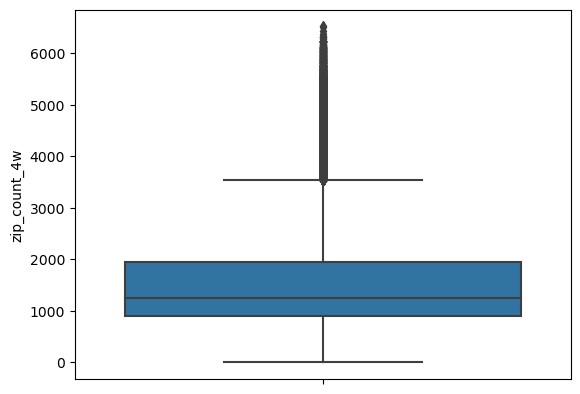

velocity_6h


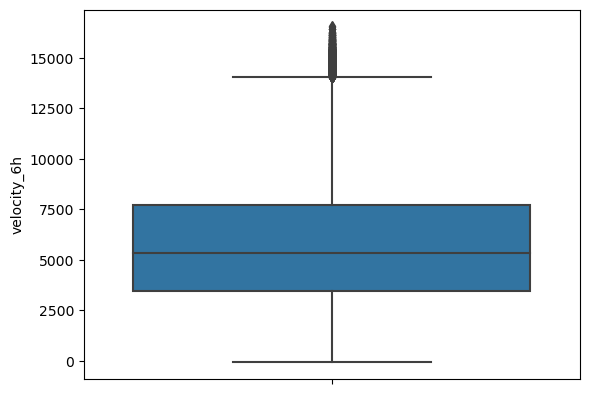

velocity_24h


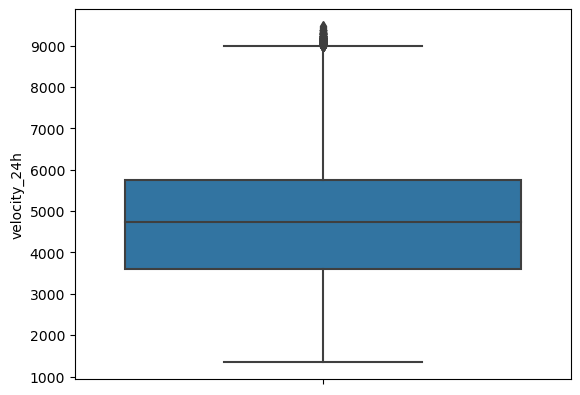

velocity_4w


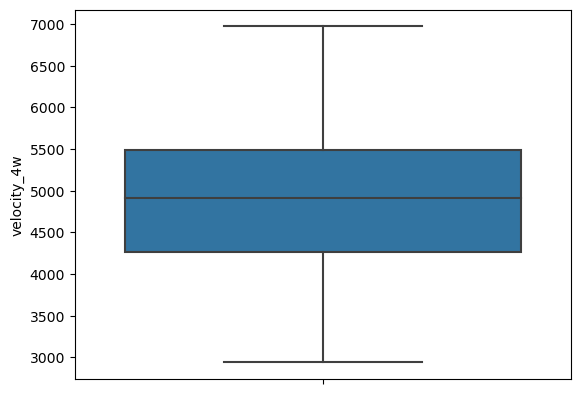

bank_branch_count_8w


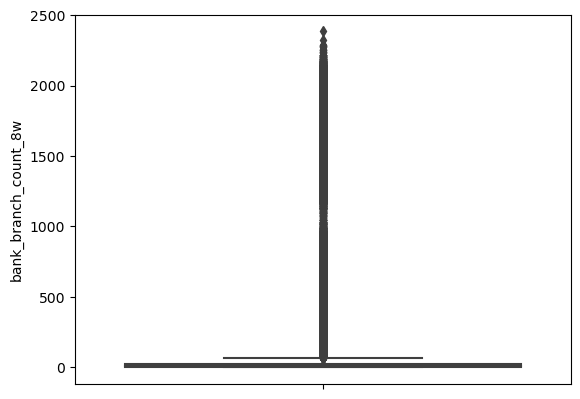

date_of_birth_distinct_emails_4w


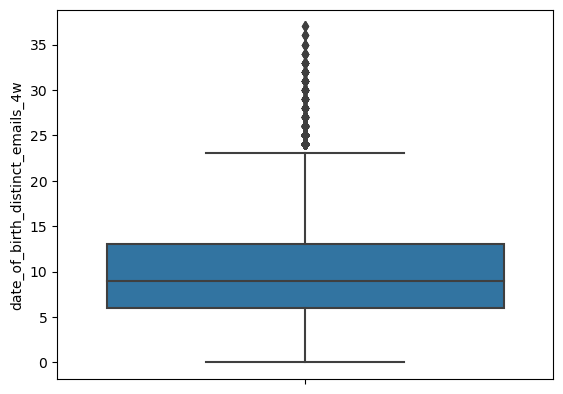

credit_risk_score


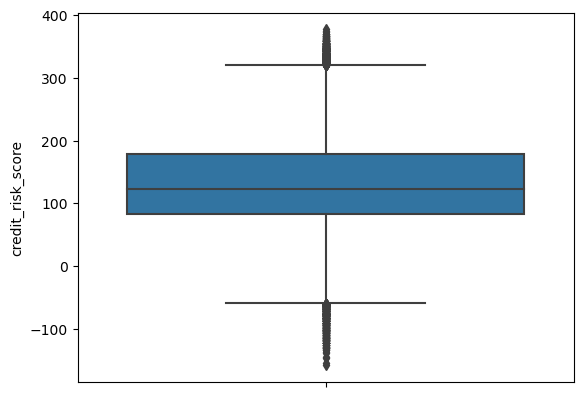

email_is_free


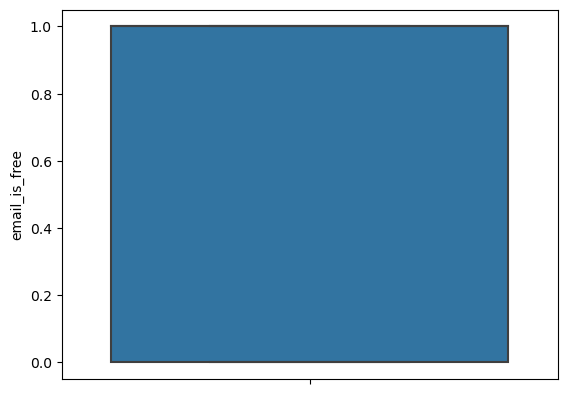

phone_home_valid


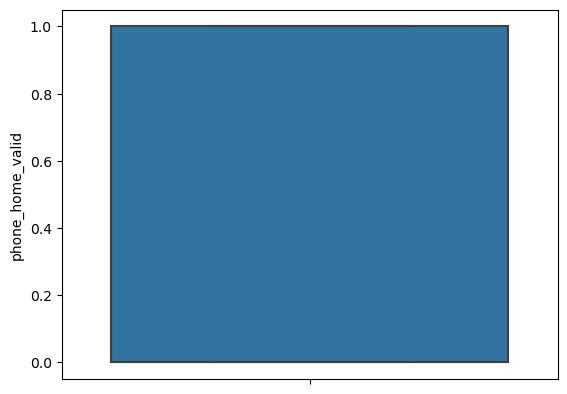

phone_mobile_valid


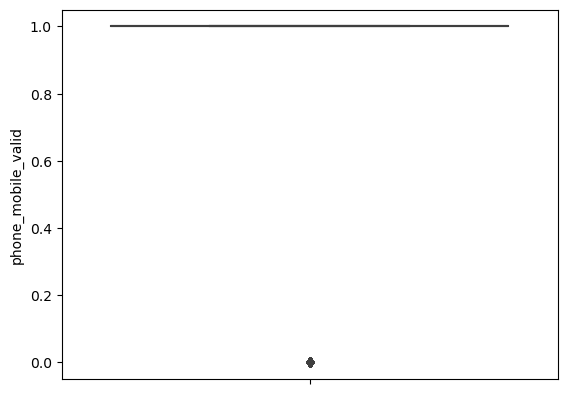

bank_months_count


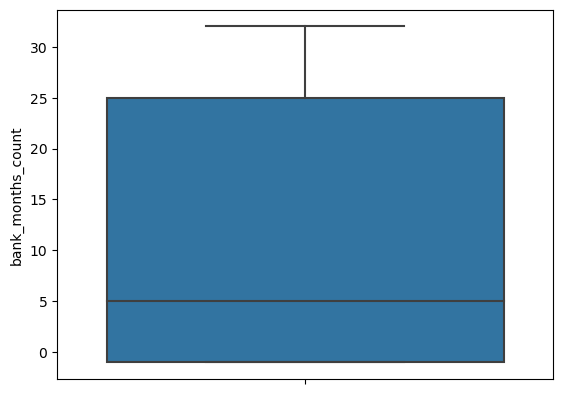

has_other_cards


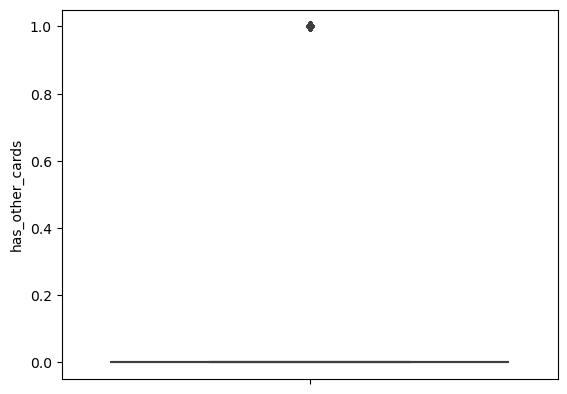

proposed_credit_limit


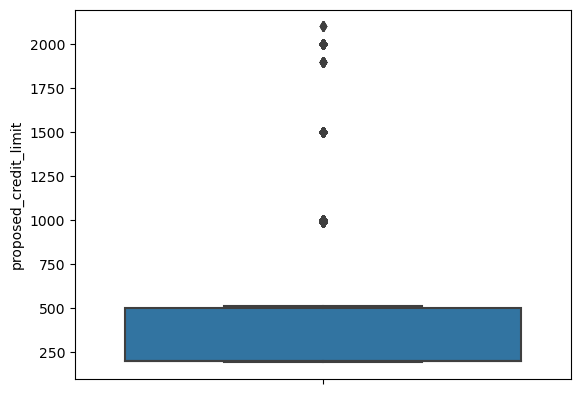

foreign_request


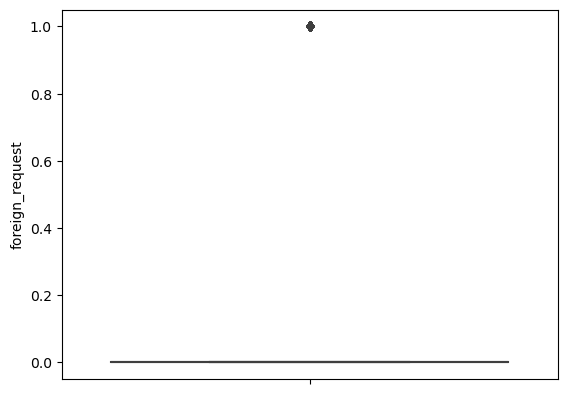

session_length_in_minutes


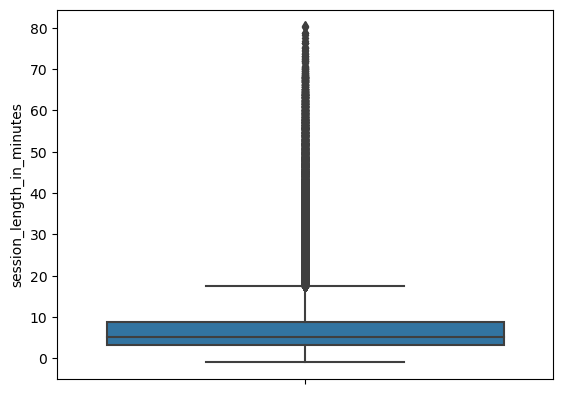

keep_alive_session


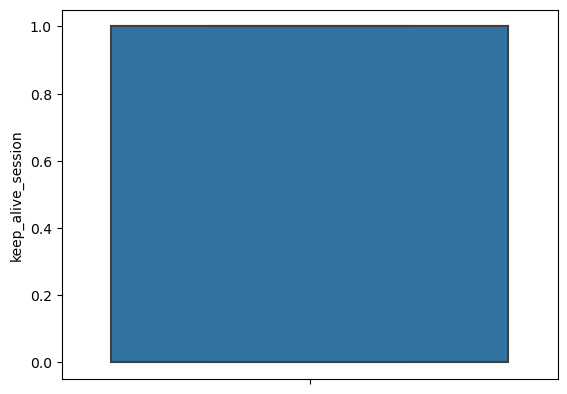

device_distinct_emails_8w


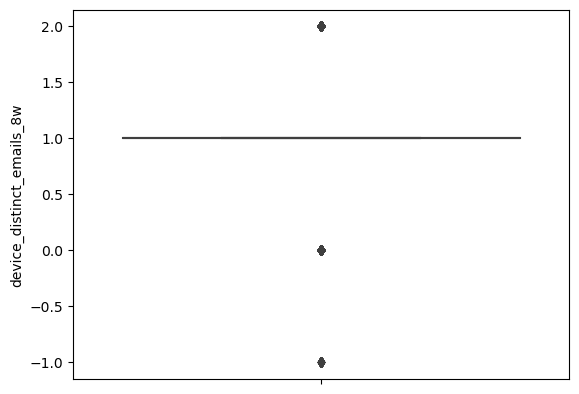

device_fraud_count


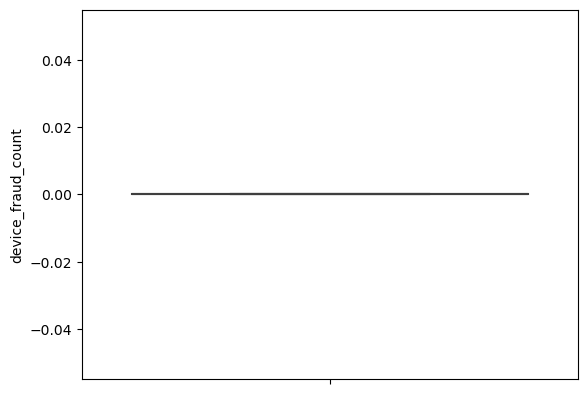

month


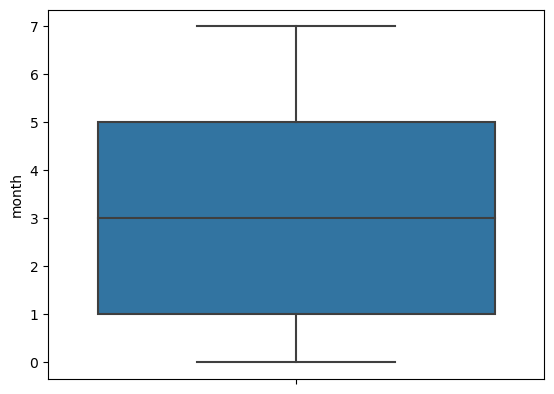

In [36]:
for i in b_num_col:
    print(i)
    sns.boxplot(y=b_num_col[i])
    plt.show()

payment_type


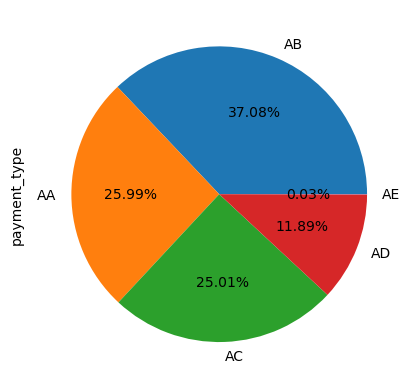

employment_status


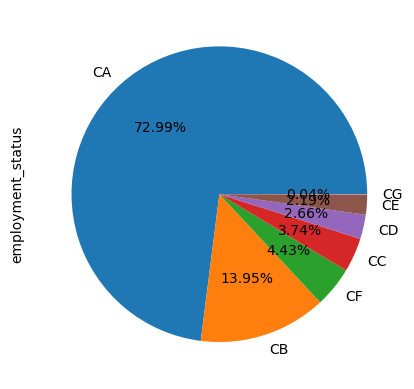

housing_status


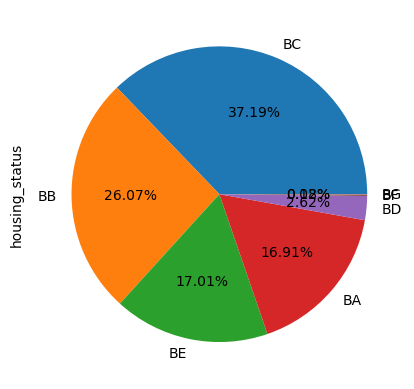

source


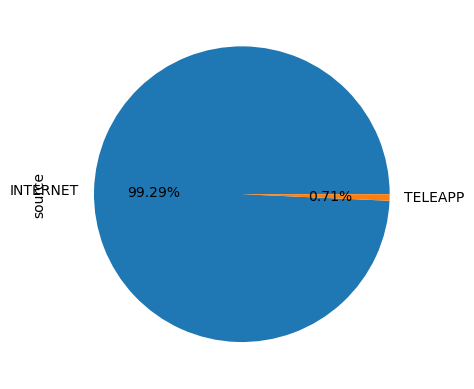

device_os


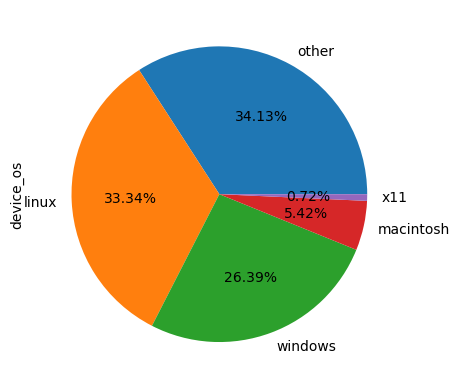

In [37]:
for i in b_cat_col:
    print(i)
    b_cat_col[i].value_counts().plot(kind='pie',autopct='%.2f%%')
    plt.show()

### Multivariate Analysis

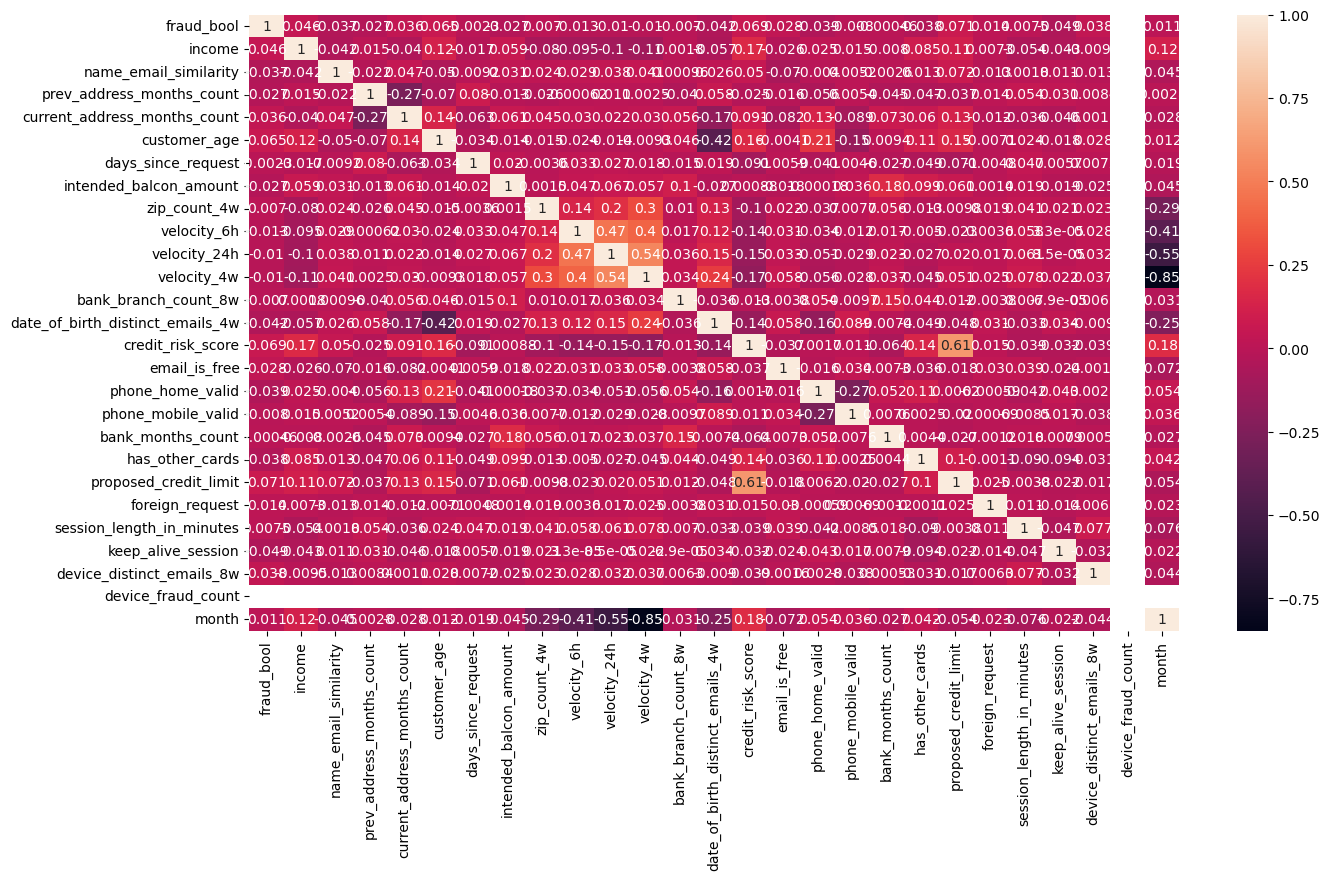

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(bank.corr(), annot=True)
plt.show()

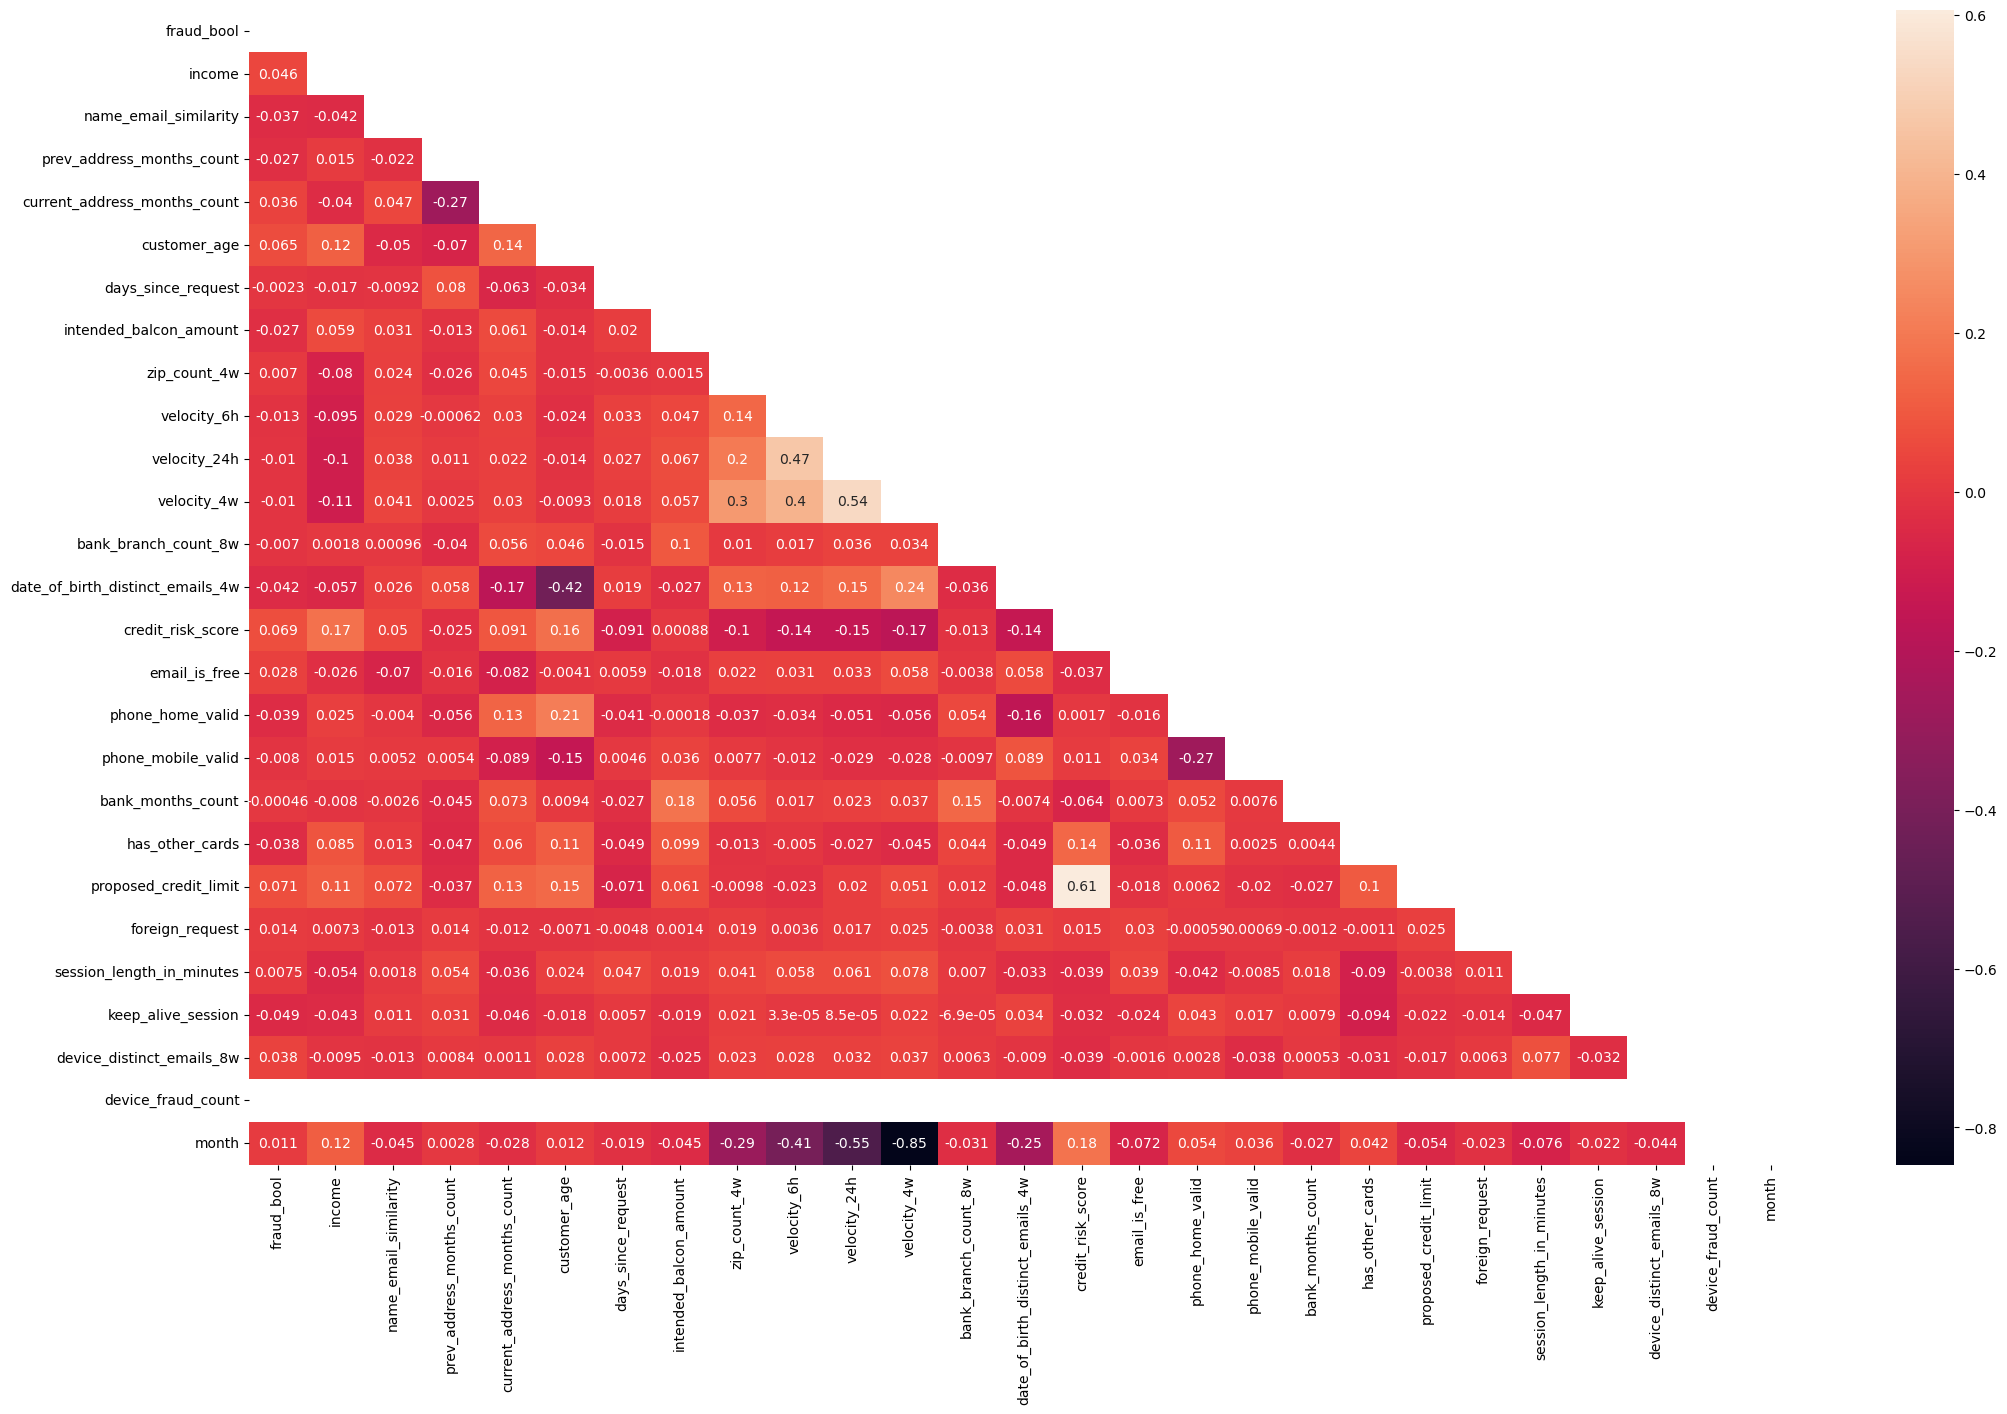

In [39]:
plt.figure(figsize=(25,15))

mask = np.triu(np.ones_like(bank.corr()))
sns.heatmap(bank.corr(), mask=mask, annot=True)
plt.show()

In [40]:
bank.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [41]:
b_num_col

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.121864,-1,56,30,31.343340,-1.123485,3359,6367.819446,...,1,-1,0,200.0,0,6.160864,0,1,0,6
1,0,0.8,0.422733,-1,300,50,0.026959,31.743971,661,3002.317485,...,0,1,0,200.0,0,14.056637,0,1,0,7
2,0,0.6,0.876756,-1,24,30,0.022468,14.987018,1314,3597.265529,...,1,10,0,200.0,0,3.019067,1,1,0,5
3,0,0.2,0.330775,-1,43,80,0.009066,49.257212,2181,849.377040,...,1,1,0,1000.0,0,3.965493,1,1,0,6
4,0,0.7,0.287905,-1,38,20,0.021911,-0.848684,1215,7833.514142,...,1,-1,0,200.0,0,9.961255,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0.7,0.727191,31,3,30,0.021402,-0.757837,1171,5800.454568,...,1,1,0,200.0,0,3.806167,1,1,0,1
99996,0,0.1,0.751184,-1,189,40,0.016241,-1.083387,1030,1630.774386,...,0,25,0,500.0,0,11.848026,1,1,0,2
99997,0,0.8,0.861189,-1,51,50,0.026774,-1.423326,1110,4841.174872,...,1,1,1,1000.0,0,0.606022,1,1,0,5
99998,0,0.5,0.354000,-1,49,30,0.006026,-1.271699,702,5279.463449,...,1,-1,0,500.0,0,4.339312,0,1,0,3


In [42]:
b_num_col.nunique()

fraud_bool                              2
income                                  9
name_email_similarity               99983
prev_address_months_count             359
current_address_months_count          404
customer_age                            9
days_since_request                  99900
intended_balcon_amount              99941
zip_count_4w                         5499
velocity_6h                         99986
velocity_24h                        99991
velocity_4w                         99986
bank_branch_count_8w                 2141
date_of_birth_distinct_emails_4w       38
credit_risk_score                     511
email_is_free                           2
phone_home_valid                        2
phone_mobile_valid                      2
bank_months_count                      32
has_other_cards                         2
proposed_credit_limit                  12
foreign_request                         2
session_length_in_minutes           99773
keep_alive_session                

In [43]:
bank['customer_age'].value_counts()

30    30999
20    24824
40    23792
50    13993
60     3502
10     2107
70      649
80      125
90        9
Name: customer_age, dtype: int64

In [44]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        100000 non-null  int64  
 1   income                            100000 non-null  float64
 2   name_email_similarity             100000 non-null  float64
 3   prev_address_months_count         100000 non-null  int64  
 4   current_address_months_count      100000 non-null  int64  
 5   customer_age                      100000 non-null  int64  
 6   days_since_request                100000 non-null  float64
 7   intended_balcon_amount            100000 non-null  float64
 8   payment_type                      100000 non-null  object 
 9   zip_count_4w                      100000 non-null  int64  
 10  velocity_6h                       100000 non-null  float64
 11  velocity_24h                      100000 non-null  fl

In [45]:
bank.nunique()[bank.nunique()<10].astype(object)

fraud_bool                   2
income                       9
customer_age                 9
payment_type                 5
employment_status            7
email_is_free                2
housing_status               7
phone_home_valid             2
phone_mobile_valid           2
has_other_cards              2
foreign_request              2
source                       2
device_os                    5
keep_alive_session           2
device_distinct_emails_8w    4
device_fraud_count           1
month                        8
dtype: object

In [46]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        100000 non-null  int64  
 1   income                            100000 non-null  float64
 2   name_email_similarity             100000 non-null  float64
 3   prev_address_months_count         100000 non-null  int64  
 4   current_address_months_count      100000 non-null  int64  
 5   customer_age                      100000 non-null  int64  
 6   days_since_request                100000 non-null  float64
 7   intended_balcon_amount            100000 non-null  float64
 8   payment_type                      100000 non-null  object 
 9   zip_count_4w                      100000 non-null  int64  
 10  velocity_6h                       100000 non-null  float64
 11  velocity_24h                      100000 non-null  fl

In [47]:
bank.shape

(100000, 32)

In [48]:
bank.head(4)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.121864,-1,56,30,31.343340,-1.123485,AC,3359,...,0,200.0,0,INTERNET,6.160864,windows,0,1,0,6
1,0,0.8,0.422733,-1,300,50,0.026959,31.743971,AA,661,...,0,200.0,0,INTERNET,14.056637,macintosh,0,1,0,7
2,0,0.6,0.876756,-1,24,30,0.022468,14.987018,AA,1314,...,0,200.0,0,INTERNET,3.019067,windows,1,1,0,5
3,0,0.2,0.330775,-1,43,80,0.009066,49.257212,AA,2181,...,0,1000.0,0,INTERNET,3.965493,linux,1,1,0,6


In [49]:
b_cat_col

,payment_type,employment_status,housing_status,source,device_os
0,AC,CB,BC,INTERNET,windows
1,AA,CA,BA,INTERNET,macintosh
2,AA,CA,BC,INTERNET,windows
3,AA,CC,BC,INTERNET,linux
4,AC,CD,BB,INTERNET,linux
...,...,...,...,...,...
99995,AB,CA,BC,INTERNET,linux
99996,AD,CA,BC,INTERNET,linux
99997,AB,CA,BB,INTERNET,windows
99998,AC,CA,BC,INTERNET,windows


In [50]:
b_num_col.shape

(100000, 27)

### Steps to be done

- scaling robust & Min Max scaler
- transformation
- build a model
- encoding for categorical variable
- Some Categorical variable which are all integer need not to be transformed and need not be encoded

### Enoding

In [51]:
# first we'll do encoding for the categorical columns

In [52]:
# Encoding

In [53]:
b_cat_col.head()

,payment_type,employment_status,housing_status,source,device_os
0,AC,CB,BC,INTERNET,windows
1,AA,CA,BA,INTERNET,macintosh
2,AA,CA,BC,INTERNET,windows
3,AA,CC,BC,INTERNET,linux
4,AC,CD,BB,INTERNET,linux


In [54]:
encoded_bank_cat =  pd.get_dummies(data=b_cat_col, drop_first=True )

In [55]:
encoded_bank_cat.head()

,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
b_num_col.nunique()

fraud_bool                              2
income                                  9
name_email_similarity               99983
prev_address_months_count             359
current_address_months_count          404
customer_age                            9
days_since_request                  99900
intended_balcon_amount              99941
zip_count_4w                         5499
velocity_6h                         99986
velocity_24h                        99991
velocity_4w                         99986
bank_branch_count_8w                 2141
date_of_birth_distinct_emails_4w       38
credit_risk_score                     511
email_is_free                           2
phone_home_valid                        2
phone_mobile_valid                      2
bank_months_count                      32
has_other_cards                         2
proposed_credit_limit                  12
foreign_request                         2
session_length_in_minutes           99773
keep_alive_session                

In [57]:
b_num_col['customer_age'].value_counts()

30    30999
20    24824
40    23792
50    13993
60     3502
10     2107
70      649
80      125
90        9
Name: customer_age, dtype: int64

In [58]:
b_num_col['month'].value_counts()

3    14998
2    13705
0    13273
1    12784
4    12659
5    12001
6    10795
7     9785
Name: month, dtype: int64

In [59]:
b_num_col.nunique()[b_num_col.nunique() <10]

fraud_bool                   2
income                       9
customer_age                 9
email_is_free                2
phone_home_valid             2
phone_mobile_valid           2
has_other_cards              2
foreign_request              2
keep_alive_session           2
device_distinct_emails_8w    4
device_fraud_count           1
month                        8
dtype: int64

In [60]:
b_num_col.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
       'month'],
      dtype='object')

In [61]:
# columns need to be scaled

# prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount


In [62]:
b_num_col[b_num_col['prev_address_months_count']<0]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.121864,-1,56,30,31.343340,-1.123485,3359,6367.819446,...,1,-1,0,200.0,0,6.160864,0,1,0,6
1,0,0.8,0.422733,-1,300,50,0.026959,31.743971,661,3002.317485,...,0,1,0,200.0,0,14.056637,0,1,0,7
2,0,0.6,0.876756,-1,24,30,0.022468,14.987018,1314,3597.265529,...,1,10,0,200.0,0,3.019067,1,1,0,5
3,0,0.2,0.330775,-1,43,80,0.009066,49.257212,2181,849.377040,...,1,1,0,1000.0,0,3.965493,1,1,0,6
4,0,0.7,0.287905,-1,38,20,0.021911,-0.848684,1215,7833.514142,...,1,-1,0,200.0,0,9.961255,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0.2,0.126711,-1,121,50,0.027140,-0.761505,1340,2712.395820,...,1,21,0,200.0,0,13.780150,1,1,0,5
99996,0,0.1,0.751184,-1,189,40,0.016241,-1.083387,1030,1630.774386,...,0,25,0,500.0,0,11.848026,1,1,0,2
99997,0,0.8,0.861189,-1,51,50,0.026774,-1.423326,1110,4841.174872,...,1,1,1,1000.0,0,0.606022,1,1,0,5
99998,0,0.5,0.354000,-1,49,30,0.006026,-1.271699,702,5279.463449,...,1,-1,0,500.0,0,4.339312,0,1,0,3


In [63]:
df[df['prev_address_months_count']<0]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.121864,-1,56,30,31.343340,-1.123485,AC,3359,...,0,200.0,0,INTERNET,6.160864,windows,0,1,0,6
1,0,0.8,0.422733,-1,300,50,0.026959,31.743971,AA,661,...,0,200.0,0,INTERNET,14.056637,macintosh,0,1,0,7
2,0,0.6,0.876756,-1,24,30,0.022468,14.987018,AA,1314,...,0,200.0,0,INTERNET,3.019067,windows,1,1,0,5
3,0,0.2,0.330775,-1,43,80,0.009066,49.257212,AA,2181,...,0,1000.0,0,INTERNET,3.965493,linux,1,1,0,6
4,0,0.7,0.287905,-1,38,20,0.021911,-0.848684,AC,1215,...,0,200.0,0,INTERNET,9.961255,linux,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0.2,0.126711,-1,121,50,0.027140,-0.761505,AB,1340,...,0,200.0,0,INTERNET,13.780150,windows,1,1,0,5
99996,0,0.1,0.751184,-1,189,40,0.016241,-1.083387,AD,1030,...,0,500.0,0,INTERNET,11.848026,linux,1,1,0,2
99997,0,0.8,0.861189,-1,51,50,0.026774,-1.423326,AB,1110,...,1,1000.0,0,INTERNET,0.606022,windows,1,1,0,5
99998,0,0.5,0.354000,-1,49,30,0.006026,-1.271699,AC,702,...,0,500.0,0,INTERNET,4.339312,windows,0,1,0,3


In [64]:
b_num_col.nunique()[b_num_col.nunique() == 2]

fraud_bool            2
email_is_free         2
phone_home_valid      2
phone_mobile_valid    2
has_other_cards       2
foreign_request       2
keep_alive_session    2
dtype: int64

In [65]:
for i in b_num_col:
    if b_num_col[i].nunique() == 2:
        print(i)
        print('')
        print(b_num_col[i].value_counts())
        print('***************')
    else:
        print('Greater than 2')

fraud_bool

0    98864
1     1136
Name: fraud_bool, dtype: int64
***************
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
Greater than 2
email_is_free

1    53253
0    46747
Name: email_is_free, dtype: int64
***************
phone_home_valid

0    58132
1    41868
Name: phone_home_valid, dtype: int64
***************
phone_mobile_valid

1    89113
0    10887
Name: phone_mobile_valid, dtype: int64
***************
Greater than 2
has_other_cards

0    77768
1    22232
Name: has_other_cards, dtype: int64
***************
Greater than 2
foreign_request

0    97443
1     2557
Name: foreign_request, dtype: int64
***************
Greater than 2
keep_alive_session

1    57776
0    42224
Name: keep_alive_session, dtype: int64
***************
Greater than 2
Greater than 2
Greater than 2


In [66]:
b_num_col['income'].value_counts()

0.9    22327
0.1    15662
0.8    14596
0.6    11194
0.7    10485
0.4     8110
0.2     7020
0.5     5475
0.3     5131
Name: income, dtype: int64

In [67]:
b_num_col['device_distinct_emails_8w'].value_counts()

 1    96852
 2     2478
 0      628
-1       42
Name: device_distinct_emails_8w, dtype: int64

In [68]:
b_num_col['month'].value_counts()

3    14998
2    13705
0    13273
1    12784
4    12659
5    12001
6    10795
7     9785
Name: month, dtype: int64

In [69]:
b_num_col['customer_age'].value_counts()

30    30999
20    24824
40    23792
50    13993
60     3502
10     2107
70      649
80      125
90        9
Name: customer_age, dtype: int64

In [70]:
b_num_col['customer_age_new'] = b_num_col['customer_age'].apply(lambda x: x/100)

In [71]:
b_num_col['customer_age_new'].value_counts()

0.3    30999
0.2    24824
0.4    23792
0.5    13993
0.6     3502
0.1     2107
0.7      649
0.8      125
0.9        9
Name: customer_age_new, dtype: int64

In [72]:
b_num_col['month_new'] = b_num_col['month'].apply(lambda x: x/10)

In [73]:
b_num_col['month_new'].value_counts()

0.3    14998
0.2    13705
0.0    13273
0.1    12784
0.4    12659
0.5    12001
0.6    10795
0.7     9785
Name: month_new, dtype: int64

In [74]:
b_num_col.nunique()[b_num_col.nunique()<10]

fraud_bool                   2
income                       9
customer_age                 9
email_is_free                2
phone_home_valid             2
phone_mobile_valid           2
has_other_cards              2
foreign_request              2
keep_alive_session           2
device_distinct_emails_8w    4
device_fraud_count           1
month                        8
customer_age_new             9
month_new                    8
dtype: int64

In [75]:
b_num_col.drop('device_fraud_count', axis=1, inplace=True)

In [76]:

b_num_col.nunique()[b_num_col.nunique()<10]

fraud_bool                   2
income                       9
customer_age                 9
email_is_free                2
phone_home_valid             2
phone_mobile_valid           2
has_other_cards              2
foreign_request              2
keep_alive_session           2
device_distinct_emails_8w    4
month                        8
customer_age_new             9
month_new                    8
dtype: int64

In [77]:
# b_num_col.nunique()

In [78]:
b_num_col.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,customer_age_new,month_new
0,0,0.6,0.121864,-1,56,30,31.343340,-1.123485,3359,6367.819446,...,-1,0,200.0,0,6.160864,0,1,6,0.3,0.6
1,0,0.8,0.422733,-1,300,50,0.026959,31.743971,661,3002.317485,...,1,0,200.0,0,14.056637,0,1,7,0.5,0.7
2,0,0.6,0.876756,-1,24,30,0.022468,14.987018,1314,3597.265529,...,10,0,200.0,0,3.019067,1,1,5,0.3,0.5
3,0,0.2,0.330775,-1,43,80,0.009066,49.257212,2181,849.377040,...,1,0,1000.0,0,3.965493,1,1,6,0.8,0.6
4,0,0.7,0.287905,-1,38,20,0.021911,-0.848684,1215,7833.514142,...,-1,0,200.0,0,9.961255,0,1,1,0.2,0.1


In [79]:
b_num_col.drop(columns=['customer_age', 'month'], inplace=True)

In [80]:
b_num_col.nunique()[b_num_col.nunique()<10]

fraud_bool                   2
income                       9
email_is_free                2
phone_home_valid             2
phone_mobile_valid           2
has_other_cards              2
foreign_request              2
keep_alive_session           2
device_distinct_emails_8w    4
customer_age_new             9
month_new                    8
dtype: int64

In [81]:
b_num_col.nunique()[b_num_col.nunique()==2]
# drop nuniques equals to 2 and drop income, customer_age_new, month_new

fraud_bool            2
email_is_free         2
phone_home_valid      2
phone_mobile_valid    2
has_other_cards       2
foreign_request       2
keep_alive_session    2
dtype: int64

In [82]:
b_num_col.nunique()[b_num_col.nunique()==2]

fraud_bool            2
email_is_free         2
phone_home_valid      2
phone_mobile_valid    2
has_other_cards       2
foreign_request       2
keep_alive_session    2
dtype: int64

In [83]:
# libraries for preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report

# import libraries for deployment
import streamlit as st

### Scaling

In [84]:
scale_attr = b_num_col.drop(columns=['fraud_bool', 'email_is_free','phone_home_valid','phone_mobile_valid',
                                    'has_other_cards','foreign_request','keep_alive_session', 'customer_age_new',
                                    'month_new','income'])

In [85]:
scale_attr.nunique()

name_email_similarity               99983
prev_address_months_count             359
current_address_months_count          404
days_since_request                  99900
intended_balcon_amount              99941
zip_count_4w                         5499
velocity_6h                         99986
velocity_24h                        99991
velocity_4w                         99986
bank_branch_count_8w                 2141
date_of_birth_distinct_emails_4w       38
credit_risk_score                     511
bank_months_count                      32
proposed_credit_limit                  12
session_length_in_minutes           99773
device_distinct_emails_8w               4
dtype: int64

In [86]:
scale_attr.columns

Index(['name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes', 'device_distinct_emails_8w'],
      dtype='object')

In [87]:
rs = RobustScaler()
rs_scale_attr = rs.fit_transform(scale_attr)

In [88]:
rs_scale_attr

array([[-0.6944177 ,  0.        ,  0.02702703, ...,  0.        ,
         0.18116085,  0.        ],
       [-0.12797854,  0.        ,  2.22522523, ...,  0.        ,
         1.55153638,  0.        ],
       [ 0.72680034,  0.        , -0.26126126, ...,  0.        ,
        -0.36412349,  0.        ],
       ...,
       [ 0.69749233,  0.        , -0.01801802, ...,  2.66666667,
        -0.78292697,  0.        ],
       [-0.25738122,  0.        , -0.03603604, ...,  1.        ,
        -0.13498414,  0.        ],
       [ 0.09745304,  0.        ,  0.47747748, ...,  0.        ,
        -0.28774964,  0.        ]])

In [89]:
rs_scale_attr = pd.DataFrame(rs_scale_attr, columns=['name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes', 'device_distinct_emails_8w'])

In [90]:
rs_scale_attr.head()

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w
0,-0.694418,0.0,0.027027,1631.631585,-0.042456,1.994307,0.246591,-0.855970,-1.471307,-0.36,-0.857143,0.589474,-0.230769,0.000000,0.181161,0.0
1,-0.127979,0.0,2.225225,0.613484,4.669838,-0.565465,-0.549677,-0.096744,-1.469253,35.28,-1.000000,-0.526316,-0.153846,0.000000,1.551536,0.0
2,0.726800,0.0,-0.261261,0.379585,2.267350,0.054080,-0.408914,0.277162,-0.598985,22.88,0.142857,-0.105263,0.192308,0.000000,-0.364123,0.0
3,-0.301106,0.0,-0.090090,-0.318412,7.180758,0.876660,-1.059057,0.449193,-0.669564,0.00,-1.000000,1.200000,-0.153846,2.666667,-0.199864,0.0
4,-0.381815,0.0,-0.135135,0.350587,-0.003057,-0.039848,0.593371,0.428733,0.535759,-0.32,0.285714,-1.326316,-0.230769,0.000000,0.840750,0.0


In [91]:
rs_scale_attr


,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w
0,-0.694418,0.000000,0.027027,1631.631585,-0.042456,1.994307,0.246591,-0.855970,-1.471307,-0.36,-0.857143,0.589474,-0.230769,0.000000,0.181161,0.0
1,-0.127979,0.000000,2.225225,0.613484,4.669838,-0.565465,-0.549677,-0.096744,-1.469253,35.28,-1.000000,-0.526316,-0.153846,0.000000,1.551536,0.0
2,0.726800,0.000000,-0.261261,0.379585,2.267350,0.054080,-0.408914,0.277162,-0.598985,22.88,0.142857,-0.105263,0.192308,0.000000,-0.364123,0.0
3,-0.301106,0.000000,-0.090090,-0.318412,7.180758,0.876660,-1.059057,0.449193,-0.669564,0.00,-1.000000,1.200000,-0.153846,2.666667,-0.199864,0.0
4,-0.381815,0.000000,-0.135135,0.350587,-0.003057,-0.039848,0.593371,0.428733,0.535759,-0.32,0.285714,-1.326316,-0.230769,0.000000,0.840750,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.445217,2.461538,-0.450450,0.324081,0.009968,-0.081594,0.112355,1.324569,1.387185,0.28,0.857143,-0.757895,-0.153846,0.000000,-0.227516,0.0
99996,0.490388,0.000000,1.225225,0.055249,-0.036707,-0.215370,-0.874180,-0.261476,0.637796,-0.24,0.000000,0.200000,0.769231,1.000000,1.168214,0.0
99997,0.697492,0.000000,-0.018018,0.603870,-0.085445,-0.139469,-0.114608,-0.450119,-0.561527,31.16,-0.428571,0.873684,-0.153846,2.666667,-0.782927,0.0
99998,-0.257381,0.000000,-0.036036,-0.476733,-0.063706,-0.526565,-0.010911,-0.560162,-1.471951,-0.32,0.142857,0.073684,-0.230769,1.000000,-0.134984,0.0


In [92]:
df2 = b_num_col[['fraud_bool', 'email_is_free', 'phone_mobile_valid', 'phone_home_valid', 'has_other_cards',
                 'foreign_request','keep_alive_session', 'income','customer_age_new','month_new']]

In [93]:
df2.shape

(100000, 10)

In [94]:
df2

,fraud_bool,email_is_free,phone_mobile_valid,phone_home_valid,has_other_cards,foreign_request,keep_alive_session,income,customer_age_new,month_new
0,0,1,1,0,0,0,0,0.6,0.3,0.6
1,0,0,0,1,0,0,0,0.8,0.5,0.7
2,0,1,1,1,0,0,1,0.6,0.3,0.5
3,0,1,1,1,0,0,1,0.2,0.8,0.6
4,0,1,1,0,0,0,0,0.7,0.2,0.1
...,...,...,...,...,...,...,...,...,...,...
99995,0,0,1,0,0,0,1,0.7,0.3,0.1
99996,0,1,0,1,0,0,1,0.1,0.4,0.2
99997,0,0,1,1,1,0,1,0.8,0.5,0.5
99998,0,0,1,1,0,0,0,0.5,0.3,0.3


In [95]:
# b_num_col.nunique()[b_num_col.nunique()==2]

In [96]:
# b_num_col.nunique()[b_num_col.nunique() < 10]

In [97]:
# b_num_col.columns

In [98]:
rs_scale_attr.head(3)

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w
0,-0.694418,0.0,0.027027,1631.631585,-0.042456,1.994307,0.246591,-0.855970,-1.471307,-0.36,-0.857143,0.589474,-0.230769,0.0,0.181161,0.0
1,-0.127979,0.0,2.225225,0.613484,4.669838,-0.565465,-0.549677,-0.096744,-1.469253,35.28,-1.000000,-0.526316,-0.153846,0.0,1.551536,0.0
2,0.726800,0.0,-0.261261,0.379585,2.267350,0.054080,-0.408914,0.277162,-0.598985,22.88,0.142857,-0.105263,0.192308,0.0,-0.364123,0.0


In [99]:
rs_scale_attr.shape

(100000, 16)

In [100]:
# rs_scale_attr, df2, encoded_bank_cat

In [101]:
df_1 = rs_scale_attr.reset_index(drop=True)
df_2 = df2.reset_index(drop=True)
df_3 = encoded_bank_cat.reset_index(drop=True)

In [102]:
# df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
# df2 = pd.DataFrame({'A': [7, 8, 9], 'B': [10, 11, 12]})

# # Reset the index of both dataframes
# df1 = df1.reset_index(drop=True)
# df2 = df2.reset_index(drop=True)

# # Concatenate the dataframes
# concatenated_df = pd.concat([df1, df2], axis=0)

# # Print the concatenated dataframe
# print(concatenated_df)

In [103]:
147099 + 1941

149040

In [104]:
bank_final = pd.concat([df_1, df_2], axis=1)

In [105]:
bank_final.isnull().sum()

name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
days_since_request                  0
intended_balcon_amount              0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
bank_months_count                   0
proposed_credit_limit               0
session_length_in_minutes           0
device_distinct_emails_8w           0
fraud_bool                          0
email_is_free                       0
phone_mobile_valid                  0
phone_home_valid                    0
has_other_cards                     0
foreign_request                     0
keep_alive_session                  0
income                              0
customer_age_new                    0
month_new                           0
dtype: int64

In [106]:
bank_f = pd.concat([bank_final, df_3], axis=1)

In [107]:
# bank_f.isnull().sum()

In [108]:
bank_f.head()

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,-0.694418,0.0,0.027027,1631.631585,-0.042456,1.994307,0.246591,-0.855970,-1.471307,-0.36,...,1,0,0,0,0,0,0,0,1,0
1,-0.127979,0.0,2.225225,0.613484,4.669838,-0.565465,-0.549677,-0.096744,-1.469253,35.28,...,0,0,0,0,0,0,1,0,0,0
2,0.726800,0.0,-0.261261,0.379585,2.267350,0.054080,-0.408914,0.277162,-0.598985,22.88,...,1,0,0,0,0,0,0,0,1,0
3,-0.301106,0.0,-0.090090,-0.318412,7.180758,0.876660,-1.059057,0.449193,-0.669564,0.00,...,1,0,0,0,0,0,0,0,0,0
4,-0.381815,0.0,-0.135135,0.350587,-0.003057,-0.039848,0.593371,0.428733,0.535759,-0.32,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# bank_f.info()

In [110]:
bank_f.shape

(100000, 47)

In [111]:
bank_f['fraud_bool'].value_counts()

0    98864
1     1136
Name: fraud_bool, dtype: int64

###  Building the Base Model

In [112]:
import statsmodels.api as sm

In [113]:
bank_f.shape

(100000, 47)

In [114]:
X = bank_f.drop(columns=['fraud_bool'])
y = bank_f['fraud_bool']

In [115]:
Xc = sm.add_constant(X)

# Create a logistic regression model and fitting
logit_model = sm.Logit(y, Xc).fit()

# Print the summary of the model
print(logit_model.summary())

         Current function value: 0.047677
         Iterations: 35


C:\Users\ezhil\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:             fraud_bool   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99953
Method:                           MLE   Df Model:                           46
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.2330
Time:                        12:02:23   Log-Likelihood:                -4767.7
converged:                      False   LL-Null:                       -6216.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.7859      0.267    -21.679      0.000      -6.309      -5.263
name_email_similarity               -0.6314      0.059    -10.671

In [116]:
logit_model.pvalues

const                               3.219738e-104
name_email_similarity                1.393098e-26
prev_address_months_count            1.613591e-09
current_address_months_count         1.105313e-01
days_since_request                   2.438074e-01
intended_balcon_amount               4.831467e-05
zip_count_4w                         8.629782e-06
velocity_6h                          7.524212e-01
velocity_24h                         4.541802e-01
velocity_4w                          7.077691e-01
bank_branch_count_8w                 6.195855e-01
date_of_birth_distinct_emails_4w     7.874067e-04
credit_risk_score                    5.806298e-04
bank_months_count                    1.809292e-06
proposed_credit_limit                3.082588e-07
session_length_in_minutes            8.778129e-01
device_distinct_emails_8w            6.367728e-16
email_is_free                        9.683962e-19
phone_mobile_valid                   1.329767e-01
phone_home_valid                     3.813725e-37


In [117]:
# Customized rfe code
cols = list(X.columns)

while len(cols)>0:
    Xc = sm.add_constant(X[cols])
    logit_model = sm.Logit(y, Xc).fit() 
    pval = logit_model.pvalues[1:]
    max_pval = pval.max()
    f_r = pval.idxmax()
    
    if max_pval > 0.05:
        cols.remove(f_r)
    else:
        break
        
print("Significant Features,", cols)

         Current function value: 0.047677
         Iterations: 35


C:\Users\ezhil\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.047679
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.047679
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.047679
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.047680
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.047681
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.047682
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.047685
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.047690
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.047695
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

In [151]:
significant_features= ['name_email_similarity', 'prev_address_months_count', 'days_since_request', 
                       'zip_count_4w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 
                       'bank_months_count', 'proposed_credit_limit', 'device_distinct_emails_8w', 
                       'email_is_free', 'phone_mobile_valid', 'phone_home_valid', 'has_other_cards', 
                       'foreign_request', 'keep_alive_session', 'income', 'customer_age_new', 'month_new', 
                       'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'employment_status_CB', 
                       'employment_status_CE', 'employment_status_CF', 'housing_status_BB', 'housing_status_BC', 
                       'housing_status_BD', 'housing_status_BE', 'device_os_macintosh', 'device_os_windows']


In [152]:
len(significant_features)

30

In [119]:
# len(significant_features)
# X.shape

In [120]:
# Out of 46 columns we can see that we have 30 significant features let's build another base model with these 30 columns

In [121]:
# Building another base model

Xc= sm.add_constant(X[significant_features])
logit_model_2 = sm.Logit(y, Xc).fit()
print(logit_model_2.summary())

Optimization terminated successfully.
         Current function value: 0.047885
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             fraud_bool   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99969
Method:                           MLE   Df Model:                           30
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.2297
Time:                        12:02:40   Log-Likelihood:                -4788.5
converged:                       True   LL-Null:                       -6216.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -6.0235      0.225    -26.8

In [145]:
# Customized rfe code
cols = list(X.columns)

while len(cols)>0:
    Xc = sm.add_constant(X[significant_features])
    logit_model_2 = sm.Logit(y, Xc).fit() 
    pval = logit_model.pvalues[1:]
    max_pval = pval.max()
    f_r = pval.idxmax()
    
    if max_pval > 0.05:
        cols.remove(f_r)
    else:
        break
        
print("Significant Features,", cols)

Optimization terminated successfully.
         Current function value: 0.047885
         Iterations 10
Significant Features, ['name_email_similarity', 'prev_address_months_count', 'days_since_request', 'zip_count_4w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'device_distinct_emails_8w', 'email_is_free', 'phone_mobile_valid', 'phone_home_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'income', 'customer_age_new', 'month_new', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'employment_status_CB', 'employment_status_CE', 'employment_status_CF', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'device_os_macintosh', 'device_os_windows']


In [148]:
significant_features_2 = ['name_email_similarity', 'prev_address_months_count', 'days_since_request', 'zip_count_4w', 
                           'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',
                           'device_distinct_emails_8w', 'email_is_free', 'phone_mobile_valid', 'phone_home_valid', 'has_other_cards',
                           'foreign_request', 'keep_alive_session', 'income', 'customer_age_new', 'month_new', 'payment_type_AB',
                           'payment_type_AC', 'payment_type_AD', 'employment_status_CB', 'employment_status_CE', 'employment_status_CF', 
                           'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
                           'housing_status_BE', 'device_os_macintosh', 'device_os_windows']

In [150]:
len(significant_features)

30

In [149]:
len(significant_features_2)

30

In [122]:
# lets implement using sklearnn algorithms using this selected feature

In [123]:
X.shape

(100000, 46)

In [124]:
X = X[significant_features]

In [125]:
X.shape

(100000, 30)

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [132]:
y.value_counts()

0    98864
1     1136
Name: fraud_bool, dtype: int64

## x_train.shape

In [133]:
def print_metrics(y_test, y_pred, model_name):
    print("The results of model:", model_name)
    print('')
    print("Accuarcy_score=", accuracy_score(y_test, y_pred))
    print('')
    print("Precision_score=", precision_score(y_test, y_pred))
    print('')
    print("Recall_score=", recall_score(y_test, y_pred))
    print('')
    print("f1_score=", f1_score(y_test, y_pred))
    print('')

In [134]:
def plot_metrics(clf, x_test, y_test, model_name):
    plot_confusion_matrix(clf, x_test, y_test, display_labels=[0,1])
    print('')
    plot_roc_curve(clf, x_test, y_test)
    print('')
    plot_precision_recall_curve(clf, x_test, y_test)

In [135]:
# fit KNN method
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_metrics(y_pred, y_test, 'KNN')

The results of model: KNN

Accuarcy_score= 0.9885

Precision_score= 0.0

Recall_score= 0.0

f1_score= 0.0



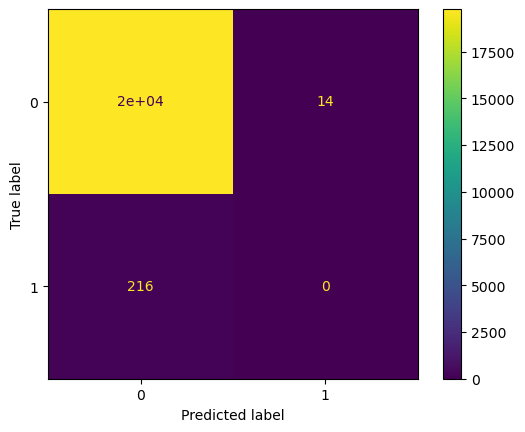

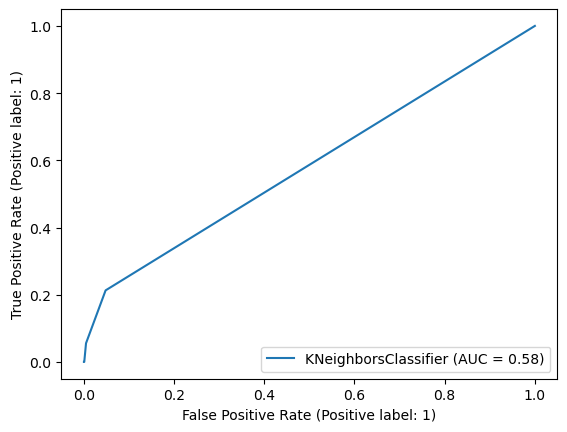

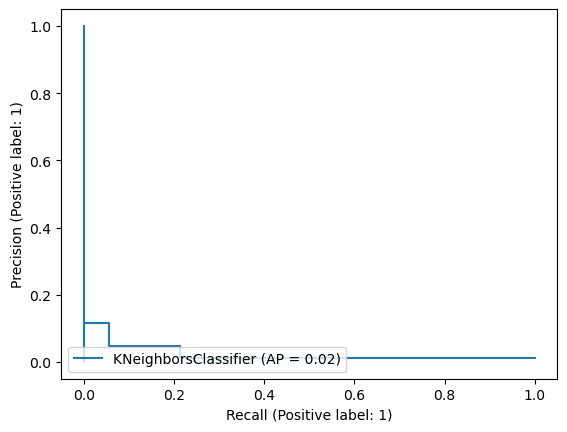

In [136]:
plot_metrics(knn, x_test, y_test, 'KNN')

In [137]:
# fit and evaluate all the modeland choose the best to deploy
clfs = {
    'LogisticRegression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN':KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier(),
    'SVM':SVC()
}

# create an empty dataframe of metrics
models_report = pd.DataFrame(columns=['Model_name','Accuracy','Recall','Precision',
                                    'f1_score'])

# fit and evaluate each model
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    print('Fitting Classifier....', clf_name)
    y_pred=clf.predict(x_test)
    t=pd.Series({
        'Model_name':clf_name,
        'Accuracy':accuracy_score(y_test, y_pred),
        'Recall':recall_score(y_test, y_pred),
        'Precision':precision_score(y_test, y_pred),
        'f1_score':f1_score(y_test, y_pred)
    })
    models_report = models_report.append(t, ignore_index=True)
    
models_report=models_report.sort_values(by='f1_score', ascending=False)
models_report

Fitting Classifier.... LogisticRegression
Fitting Classifier.... Naive Bayes
Fitting Classifier.... KNN
Fitting Classifier.... DecisionTreeClassifier
Fitting Classifier.... RandomForestClassifier
Fitting Classifier.... AdaBoostClassifier
Fitting Classifier.... GradientBoostingClassifier
Fitting Classifier.... XGBClassifier
Fitting Classifier.... SVM


,Model_name,Accuracy,Recall,Precision,f1_score
1,Naive Bayes,0.91590,0.421296,0.055218,0.097639
5,AdaBoostClassifier,0.98925,0.046296,0.526316,0.085106
3,DecisionTreeClassifier,0.97600,0.097222,0.068627,0.080460
7,XGBClassifier,0.98895,0.027778,0.352941,0.051502
6,GradientBoostingClassifier,0.98890,0.023148,0.312500,0.043103
4,RandomForestClassifier,0.98925,0.004630,1.000000,0.009217
0,LogisticRegression,0.98920,0.004630,0.500000,0.009174
2,KNN,0.98850,0.000000,0.000000,0.000000
8,SVM,0.98920,0.000000,0.000000,0.000000


In [138]:
# Now lets improvise the top 3 performing model
# Naive Bayes, AdaBoostClassifier, GradientBoositngClassifier

In [139]:
# Niave Bayes
nb = GaussianNB()
nb.fit(x_train, Y_train)
Y_pred = nb.predict(x_test)
print_metrics(Y_test, Y_pred, 'Naive Bayes')

The results of model: Naive Bayes

Accuarcy_score= 0.9159

Precision_score= 0.05521844660194175

Recall_score= 0.4212962962962963

f1_score= 0.09763948497854077



In [140]:
# Ada Boost Classifier
abc = AdaBoostClassifier()
abc.fit(x_train, Y_train)
Y_pred = abc.predict(x_test)
print_metrics(Y_test, Y_pred, 'Ada Boost Classifier')

The results of model: Ada Boost Classifier

Accuarcy_score= 0.98925

Precision_score= 0.5263157894736842

Recall_score= 0.046296296296296294

f1_score= 0.0851063829787234



In [141]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, Y_train)
Y_pred = gbc.predict(x_test)
print_metrics(Y_pred, y_test, "Gradient Boosting Classifier")

The results of model: Gradient Boosting Classifier

Accuarcy_score= 0.9889

Precision_score= 0.023148148148148147

Recall_score= 0.3125

f1_score= 0.043103448275862065



In [143]:
rfc = RandomForestClassifier()

In [1]:
# # optimize the rfc model using GridSearchCV
# param_grid={
#     'n_estimators':[100,150,200,250,300],
#     'min_samples_leaf':range(1,5,1),
#     'min_samples_split':range(2,10,2),
#     'max_depth':[1,2,3,4,5],
#     'criterion':['entropy','gini']
# }
# n_folds=3
# cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=n_folds, n_jobs=-1, verbose=5,return_train_score=False)
# cv.fit(x_train, y_train)
# cv.best_score_

In [ ]:
RandomForestClassifier()

In [ ]:
GaussianNB()

In [ ]:
AdaBoostClassifier()

In [ ]:
GradientBoostingClassifier()

In [ ]:
X.columns

In [ ]:
X.head()